<h1 style="font-size:9vw"> <center>Life Expectancy Visualization Part II</center></h1>
<h4 style="font-size:4vw"> <center>Machine Learning Models</center></h4>

<img src="https://images.everydayhealth.com/images/healthy-living/us-life-expectancy-drops-722x406.jpg" width="100%">

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
#from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Importing Data

In [2]:
df = pd.read_csv('../input/life-expectancy-who/Life Expectancy Data.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

# Exploration

In [3]:
df.shape

(2938, 22)

In [4]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [5]:
pd.options.display.float_format = '{:.2f}'.format

df.describe().T

count        mean         std     min  \
Year                            2938.00     2007.52        4.61 2000.00   
Life expectancy                 2928.00       69.22        9.52   36.30   
Adult Mortality                 2928.00      164.80      124.29    1.00   
infant deaths                   2938.00       30.30      117.93    0.00   
Alcohol                         2744.00        4.60        4.05    0.01   
percentage expenditure          2938.00      738.25     1987.91    0.00   
Hepatitis B                     2385.00       80.94       25.07    1.00   
Measles                         2938.00     2419.59    11467.27    0.00   
 BMI                            2904.00       38.32       20.04    1.00   
under-five deaths               2938.00       42.04      160.45    0.00   
Polio                           2919.00       82.55       23.43    3.00   
Total expenditure               2712.00        5.94        2.50    0.37   
Diphtheria                      2919.00       82.32       23.72    2.00   
 HIV/AIDS                       2938.00        1.74        5.08    0.10   
GDP                             2490.00     7483.16    14270.17    1.68   
Population                      2286.00 12753375.12 61012096.51   34.00   
 thinness  1-19 years           2904.00        4.84        4.42    0.10   
 thinness 5-9 years             2904.00        4.87        4.51    0.10   
Income composition of resources 2771.00        0.63        0.21    0.00   
Schooling                       2775.00       11.99        3.36    0.00   

                                      25%        50%        75%           max  
Year                              2004.00    2008.00    2012.00       2015.00  
Life expectancy                     63.10      72.10      75.70         89.00  
Adult Mortality                     74.00     144.00     228.00        723.00  
infant deaths                        0.00       3.00      22.00       1800.00  
Alcohol                              0.88       3.75       7.70         17.87  
percentage expenditure               4.69      64.91     441.53      19479.91  
Hepatitis B                         77.00      92.00      97.00         99.00  
Measles                              0.00      17.00     360.25     212183.00  
 BMI                                19.30      43.50      56.20         87.30  
under-five deaths                    0.00       4.00      28.00       2500.00  
Polio                               78.00      93.00      97.00         99.00  
Total expenditure                    4.26       5.75       7.49         17.60  
Diphtheria                          78.00      93.00      97.00         99.00  
 HIV/AIDS                            0.10       0.10       0.80         50.60  
GDP                                463.94    1766.95    5910.81     119172.74  
Population                      195793.25 1386542.00 7420359.00 1293859294.00  
 thinness  1-19 years                1.60       3.30       7.20         27.70  
 thinness 5-9 years                  1.50       3.30       7.20         28.60  
Income composition of resources      0.49       0.68       0.78          0.95  
Schooling                           10.10      12.30      14.30         20.70

In [6]:
df.describe(include='object')

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

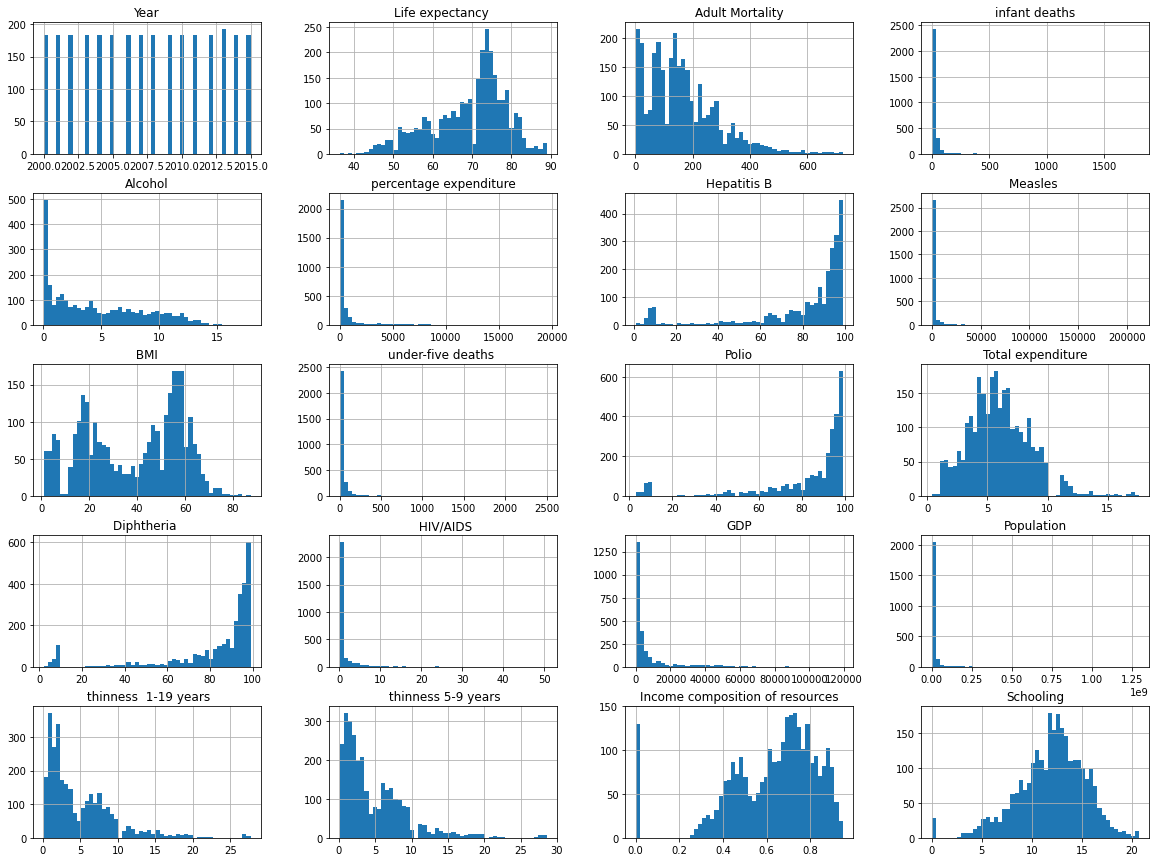

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

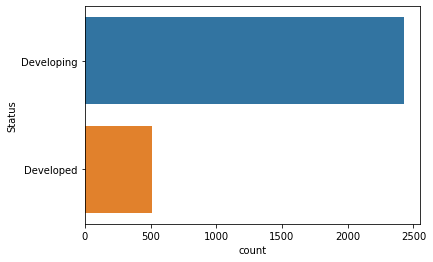

In [9]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df)
        plt.show()

In [10]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        display(df.groupby(column).mean())

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
Status                                                                          
Developed  2007.50             79.20            79.69           1.49     9.83   
Developing 2007.52             67.11           182.83          36.38     3.48   

            percentage expenditure  Hepatitis B  Measles    BMI   \
Status                                                             
Developed                  2703.60        88.04    499.01  51.80   
Developing                  323.47        79.76   2824.93  35.44   

            under-five deaths   Polio  Total expenditure  Diphtheria   \
Status                                                                  
Developed                 1.81  93.74               7.55        93.48   
Developing               50.53  80.17               5.59        79.95   

             HIV/AIDS      GDP  Population   thinness  1-19 years  \
Status                                                              
Developed        0.10 22053.39  6830052.83                   1.32   
Developing       2.09  4286.56 14071076.76                   5.59   

             thinness 5-9 years  Income composition of resources  Schooling  
Status                                                                       
Developed                  1.30                             0.85      15.85  
Developing                 5.64                             0.58      11.22

In [11]:
corrs = df.corr()
corrs

Year  Life expectancy   Adult Mortality  \
Year                             1.00              0.17            -0.08   
Life expectancy                  0.17              1.00            -0.70   
Adult Mortality                 -0.08             -0.70             1.00   
infant deaths                   -0.04             -0.20             0.08   
Alcohol                         -0.05              0.40            -0.20   
percentage expenditure           0.03              0.38            -0.24   
Hepatitis B                      0.10              0.26            -0.16   
Measles                         -0.08             -0.16             0.03   
 BMI                             0.11              0.57            -0.39   
under-five deaths               -0.04             -0.22             0.09   
Polio                            0.09              0.47            -0.27   
Total expenditure                0.09              0.22            -0.12   
Diphtheria                       0.13              0.48            -0.28   
 HIV/AIDS                       -0.14             -0.56             0.52   
GDP                              0.10              0.46            -0.30   
Population                       0.02             -0.02            -0.01   
 thinness  1-19 years           -0.05             -0.48             0.30   
 thinness 5-9 years             -0.05             -0.47             0.31   
Income composition of resources  0.24              0.72            -0.46   
Schooling                        0.21              0.75            -0.45   

                                 infant deaths  Alcohol  \
Year                                     -0.04    -0.05   
Life expectancy                          -0.20     0.40   
Adult Mortality                           0.08    -0.20   
infant deaths                             1.00    -0.12   
Alcohol                                  -0.12     1.00   
percentage expenditure                   -0.09     0.34   
Hepatitis B                              -0.22     0.09   
Measles                                   0.50    -0.05   
 BMI                                     -0.23     0.33   
under-five deaths                         1.00    -0.11   
Polio                                    -0.17     0.22   
Total expenditure                        -0.13     0.30   
Diphtheria                               -0.18     0.22   
 HIV/AIDS                                 0.03    -0.05   
GDP                                      -0.11     0.35   
Population                                0.56    -0.04   
 thinness  1-19 years                     0.47    -0.43   
 thinness 5-9 years                       0.47    -0.42   
Income composition of resources          -0.15     0.45   
Schooling                                -0.19     0.55   

                                 percentage expenditure  Hepatitis B  \
Year                                               0.03         0.10   
Life expectancy                                    0.38         0.26   
Adult Mortality                                   -0.24        -0.16   
infant deaths                                     -0.09        -0.22   
Alcohol                                            0.34         0.09   
percentage expenditure                             1.00         0.02   
Hepatitis B                                        0.02         1.00   
Measles                                           -0.06        -0.12   
 BMI                                               0.23         0.15   
under-five deaths                                 -0.09        -0.23   
Polio                                              0.15         0.49   
Total expenditure                                  0.17         0.06   
Diphtheria                                         0.14         0.61   
 HIV/AIDS                                         -0.10        -0.11   
GDP                                                0.90         0.08   
Population                                  

In [12]:
data = pd.read_csv("../input/life-expectancy-who/Life Expectancy Data.csv")
countrydex_data = pd.read_csv("../input/life-expectancy-who/Life Expectancy Data.csv", index_col = 0)

pd.set_option("max_columns", None)
pd.set_option("max_rows", None)

Renaming columns for easy access

In [13]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
data.rename(columns = {'Country':'country',
                       'Year':'year',
                       'Status':'status',
                       'Life expectancy ':'life_expectancy', 
                       'Adult Mortality':'adult_mortality', 
                       'infant deaths':'infant_deaths',
                       'Alcohol':'alchohol',
                       'percentage expenditure':'percentage_expenditure',
                       'Hepatitis B':'hepatitis_b',
                       'Measles ':'measles',
                       ' BMI ':'bmi',
                       'under-five deaths ':'under-five deaths',
                       'Polio':'polio',
                       'Total expenditure':'total_expenditure',
                       'Diphtheria ':'diphtheria',
                       ' HIV/AIDS':'hiv/aids',
                       'GDP':'gdp',
                       'Population':'population',
                       ' thinness  1-19 years':'thinness_1_19_years',
                       ' thinness 5-9 years':'thinness_5_9_years',
                       'Income composition of resources':'income_composition_of_resources',
                       'Schooling':'schooling'
                       }, inplace = True)
countrydex_data.rename(columns = {
                       'Year':'year',
                       'Status':'status',
                       'Life expectancy ':'life_expectancy', 
                       'Adult Mortality':'adult_mortality', 
                       'infant deaths':'infant_deaths',
                       'Alcohol':'alchohol',
                       'percentage expenditure':'percentage_expenditure',
                       'Hepatitis B':'hepatitis_b',
                       'Measles ':'measles',
                       ' BMI ':'bmi',
                       'under-five deaths ':'under-five deaths',
                       'Polio':'polio',
                       'Total expenditure':'total_expenditure',
                       'Diphtheria ':'diphtheria',
                       ' HIV/AIDS':'hiv/aids',
                       'GDP':'gdp',
                       'Population':'population',
                       ' thinness  1-19 years':'thinness_1_19_years',
                       ' thinness 5-9 years':'thinness_5_9_years',
                       'Income composition of resources':'income_composition_of_resources',
                       'Schooling':'schooling'
                       }, inplace = True)

# Cleaning

In [15]:
data.duplicated().sum()

0

Nice, no duplicates

In [16]:
def find_missing_percent(data):
    
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

miss_data = find_missing_percent(data)
print(f"Number of columns with missing values: {str(miss_data[miss_data['PercentMissing']>0.0].shape[0])}")

display(miss_data)

Number of columns with missing values: 14


ColumnName  TotalMissingVals  PercentMissing
0                           country              0.00            0.00
1                              year              0.00            0.00
2                            status              0.00            0.00
3                   life_expectancy             10.00            0.34
4                   adult_mortality             10.00            0.34
5                     infant_deaths              0.00            0.00
6                          alchohol            194.00            6.60
7            percentage_expenditure              0.00            0.00
8                       hepatitis_b            553.00           18.82
9                           measles              0.00            0.00
10                              bmi             34.00            1.16
11                under-five deaths              0.00            0.00
12                            polio             19.00            0.65
13                total_expenditure            226.00            7.69
14                       diphtheria             19.00            0.65
15                         hiv/aids              0.00            0.00
16                              gdp            448.00           15.25
17                       population            652.00           22.19
18              thinness_1_19_years             34.00            1.16
19               thinness_5_9_years             34.00            1.16
20  income_composition_of_resources            167.00            5.68
21                        schooling            163.00            5.55

Let us analyse them one by one

**Life Expectancy and Adult Mortality**

In [17]:
#Uncomment for full access

data[data['life_expectancy'].isnull()]

country  year      status  life_expectancy  \
624            Cook Islands  2013  Developing              NaN   
769                Dominica  2013  Developing              NaN   
1650       Marshall Islands  2013  Developing              NaN   
1715                 Monaco  2013  Developing              NaN   
1812                  Nauru  2013  Developing              NaN   
1909                   Niue  2013  Developing              NaN   
1958                  Palau  2013  Developing              NaN   
2167  Saint Kitts and Nevis  2013  Developing              NaN   
2216             San Marino  2013  Developing              NaN   
2713                 Tuvalu  2013  Developing              NaN   

      adult_mortality  infant_deaths  alchohol  percentage_expenditure  \
624               NaN              0      0.01                    0.00   
769               NaN              0      0.01                   11.42   
1650              NaN              0      0.01                  871.88   
1715              NaN              0      0.01                    0.00   
1812              NaN              0      0.01                   15.61   
1909              NaN              0      0.01                    0.00   
1958              NaN              0       NaN                  344.69   
2167              NaN              0      8.54                    0.00   
2216              NaN              0      0.01                    0.00   
2713              NaN              0      0.01                   78.28   

      hepatitis_b  measles   bmi  under-five deaths  polio  total_expenditure  \
624         98.00        0 82.80                  0  98.00               3.58   
769         96.00        0 58.40                  0  96.00               5.58   
1650         8.00        0 81.60                  0  79.00              17.24   
1715        99.00        0   NaN                  0  99.00               4.30   
1812        87.00        0 87.30                  0  87.00               4.65   
1909        99.00        0 77.30                  0  99.00               7.20   
1958        99.00        0 83.30                  0  99.00               9.27   
2167        97.00        0  5.20                  0  96.00               6.14   
2216        69.00        0   NaN                  0  69.00               6.50   
2713         9.00        0 79.30                  0   9.00              16.61   

      diphtheria  hiv/aids     gdp  population  thinness_1_19_years  \
624        98.00      0.10     NaN         NaN                 0.10   
769        96.00      0.10  722.76         NaN                 2.70   
1650       79.00      0.10 3617.75         NaN                 0.10   
1715       99.00      0.10     NaN         NaN                  NaN   
1812       87.00      0.10  136.18         NaN                 0.10   
1909       99.00      0.10     NaN         NaN                 0.10   
1958       99.00      0.10 1932.12      292.00                 0.10   
2167       96.00      0.10     NaN         NaN                 3.70   
2216       69.00      0.10     NaN         NaN                  NaN   
2713        9.00      0.10 3542.14     1819.00                 0.20   

      thinness_5_9_years  income_composition_of_resources  schooling  
624                 0.10                              NaN        NaN  
769                 2.60                             0.72      12.70  
1650                0.10                              NaN       0.00  
1715                 NaN                              NaN        NaN  
1812                0.10                              NaN       9.60  
1909                0.10                              NaN        NaN  
1958                0.10                             0.78      14.20  
2167                3.60                             0.75      13.40  
2216                 NaN                              NaN      15.10  
2713                0.10                              NaN       0.00

In [18]:
#Uncomment for full access

countrydex_data['life_expectancy'].isnull()

Country
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False
Afghanistan                                             False


Upon observation we find that the country with missing life_expectancy, have data for only 1 year<br>

So the most appropriate thing to do is impute it with mean of Developing Country, as these are developing countries located in Oceania (Unforunately don't have Continent column)

However, these countries have a lot of othe missing data, and in future Imputation wont work on them(These 10 columns were a nuisance)

Hence I decided to drop them

We also deal with Adult Mortality, as countries missing data for Life Expectancy also miss data for Adult Mortality

In [19]:
data.drop(data[data['life_expectancy'].isnull()].index, inplace = True)

**Alchohol**

In [20]:
#Uncomment for full access

data[data['alchohol'].isnull()]

country  year      status  \
32                                      Algeria  2015  Developing   
48                                       Angola  2015  Developing   
64                          Antigua and Barbuda  2015  Developing   
80                                    Argentina  2015  Developing   
96                                      Armenia  2015  Developing   
112                                   Australia  2015   Developed   
128                                     Austria  2015   Developed   
144                                  Azerbaijan  2015  Developing   
160                                     Bahamas  2015  Developing   
176                                     Bahrain  2015  Developing   
192                                  Bangladesh  2015  Developing   
208                                    Barbados  2015  Developing   
224                                     Belarus  2015  Developing   
240                                     Belgium  2015   Developed   
256                                      Belize  2015  Developing   
272                                       Benin  2015  Developing   
288                                      Bhutan  2015  Developing   
304            Bolivia (Plurinational State of)  2015  Developing   
320                      Bosnia and Herzegovina  2015  Developing   
336                                    Botswana  2015  Developing   
352                                      Brazil  2015  Developing   
368                           Brunei Darussalam  2015  Developing   
384                                    Bulgaria  2015   Developed   
400                                Burkina Faso  2015  Developing   
416                                     Burundi  2015  Developing   
432                               Côte d'Ivoire  2015  Developing   
448                                  Cabo Verde  2015  Developing   
464                                    Cambodia  2015  Developing   
480                                    Cameroon  2015  Developing   
496                                      Canada  2015  Developing   
512                    Central African Republic  2015  Developing   
528                                        Chad  2015  Developing   
544                                       Chile  2015  Developing   
560                                       China  2015  Developing   
576                                    Colombia  2015  Developing   
592                                     Comoros  2015  Developing   
608                                       Congo  2015  Developing   
625                                  Costa Rica  2015  Developing   
641                                     Croatia  2015   Developed   
657                                        Cuba  2015  Developing   
673                                      Cyprus  2015   Developed   
689                                     Czechia  2015   Developed   
705       Democratic People's Republic of Korea  2015  Developing   
721            Democratic Republic of the Congo  2015  Developing   
737                                     Denmark  2015   Developed   
753                                    Djibouti  2015  Developing   
770                          Dominican Republic  2015  Developing   
786                                     Ecuador  2015  Developing   
802                                       Egypt  2015  Developing   
818                                 El Salvador  2015  Developing   
834                           Equatorial Guinea  2015  Developing   
850                                     Eritrea  2015  Developing   
866                                     Estonia  2015  Developing   
882                                    Ethiopia  2015  Developing   
898                                        Fiji  2015  Developing   
914                                     Finland  2015  Developing   
930                                      France  2015  Developing   
946                                   

South Sudan is a new country with a 'lot' of missing data

It would be safe to drop rows of South Sudan

In [21]:
data.drop(data[data['country']=='South Sudan'].index, inplace = True)

In [22]:
#Uncomment set_option for full access

data[data['alchohol'].isnull()]

country  year      status  \
32                                      Algeria  2015  Developing   
48                                       Angola  2015  Developing   
64                          Antigua and Barbuda  2015  Developing   
80                                    Argentina  2015  Developing   
96                                      Armenia  2015  Developing   
112                                   Australia  2015   Developed   
128                                     Austria  2015   Developed   
144                                  Azerbaijan  2015  Developing   
160                                     Bahamas  2015  Developing   
176                                     Bahrain  2015  Developing   
192                                  Bangladesh  2015  Developing   
208                                    Barbados  2015  Developing   
224                                     Belarus  2015  Developing   
240                                     Belgium  2015   Developed   
256                                      Belize  2015  Developing   
272                                       Benin  2015  Developing   
288                                      Bhutan  2015  Developing   
304            Bolivia (Plurinational State of)  2015  Developing   
320                      Bosnia and Herzegovina  2015  Developing   
336                                    Botswana  2015  Developing   
352                                      Brazil  2015  Developing   
368                           Brunei Darussalam  2015  Developing   
384                                    Bulgaria  2015   Developed   
400                                Burkina Faso  2015  Developing   
416                                     Burundi  2015  Developing   
432                               Côte d'Ivoire  2015  Developing   
448                                  Cabo Verde  2015  Developing   
464                                    Cambodia  2015  Developing   
480                                    Cameroon  2015  Developing   
496                                      Canada  2015  Developing   
512                    Central African Republic  2015  Developing   
528                                        Chad  2015  Developing   
544                                       Chile  2015  Developing   
560                                       China  2015  Developing   
576                                    Colombia  2015  Developing   
592                                     Comoros  2015  Developing   
608                                       Congo  2015  Developing   
625                                  Costa Rica  2015  Developing   
641                                     Croatia  2015   Developed   
657                                        Cuba  2015  Developing   
673                                      Cyprus  2015   Developed   
689                                     Czechia  2015   Developed   
705       Democratic People's Republic of Korea  2015  Developing   
721            Democratic Republic of the Congo  2015  Developing   
737                                     Denmark  2015   Developed   
753                                    Djibouti  2015  Developing   
770                          Dominican Republic  2015  Developing   
786                                     Ecuador  2015  Developing   
802                                       Egypt  2015  Developing   
818                                 El Salvador  2015  Developing   
834                           Equatorial Guinea  2015  Developing   
850                                     Eritrea  2015  Developing   
866                                     Estonia  2015  Developing   
882                                    Ethiopia  2015  Developing   
898                                        Fiji  2015  Developing   
914                                     Finland  2015  Developing   
930                                      France  2015  Developing   
946                                   

All the data for alchohol missing is from 2015
Hence we can use Back fill to fill the data

In [23]:
column = ['alchohol']
data.loc[:,column] = data.loc[:,column].bfill()

**Hepatitis B**

In [24]:
#Uncomment for full access

data[(data['hepatitis_b'].isnull())]

country  year      status  \
44                                              Algeria  2003  Developing   
45                                              Algeria  2002  Developing   
46                                              Algeria  2001  Developing   
47                                              Algeria  2000  Developing   
57                                               Angola  2006  Developing   
58                                               Angola  2005  Developing   
59                                               Angola  2004  Developing   
60                                               Angola  2003  Developing   
61                                               Angola  2002  Developing   
62                                               Angola  2001  Developing   
63                                               Angola  2000  Developing   
79                                  Antigua and Barbuda  2000  Developing   
94                                            Argentina  2001  Developing   
95                                            Argentina  2000  Developing   
127                                           Australia  2000   Developed   
158                                          Azerbaijan  2001  Developing   
159                                          Azerbaijan  2000  Developing   
175                                             Bahamas  2000  Developing   
205                                          Bangladesh  2002  Developing   
206                                          Bangladesh  2001  Developing   
207                                          Bangladesh  2000  Developing   
223                                            Barbados  2000  Developing   
286                                               Benin  2001  Developing   
287                                               Benin  2000  Developing   
332                              Bosnia and Herzegovina  2003  Developing   
333                              Bosnia and Herzegovina  2002  Developing   
334                              Bosnia and Herzegovina  2001  Developing   
335                              Bosnia and Herzegovina  2000  Developing   
410                                        Burkina Faso  2005  Developing   
411                                        Burkina Faso  2004  Developing   
412                                        Burkina Faso  2003  Developing   
413                                        Burkina Faso  2002  Developing   
414                                        Burkina Faso  2001  Developing   
415                                        Burkina Faso  2000  Developing   
428                                             Burundi  2003  Developing   
429                                             Burundi  2002  Developing   
430                                             Burundi  2001  Developing   
431                                             Burundi  2000  Developing   
447                                       Côte d'Ivoire  2000  Developing   
462                                          Cabo Verde  2001  Developing   
463                                          Cabo Verde  2000  Developing   
474                                            Cambodia  2005  Developing   
475                                            Cambodia  2004  Developing   
476                                            Cambodia  2003  Developing   
477                                            Cambodia  2002  Developing   
478                                            Cambodia  2001  Developing   
479                                            Cambodia  2000  Developing   
491                                            Cameroon  2004  Developing   
492                                            Cameroon  2003  Developing   
493                                            Cameroon  2002  Developing   
494                                            Cameroon  2001  Developing   
495                                         

We have two types of country

One which have no data for any of the years<br>
'United Kingdom of Great Britain and Northern Ireland'<br>
'Switzerland'<br>
'Slovenia'<br>
'Norway'<br>
'Japan'<br>
'Iceland'<br>
'Hungary'<br>
'Finland'<br>
'Denmark'<br>


These are developed, hence we can fill them with mean of all developed nations

In [25]:
developed_hepatitis_b_mean = data[data['status']=='Developed'].mean(skipna=True, numeric_only=True).hepatitis_b

column = ['hepatitis_b']

country_list_a = [
    'United Kingdom of Great Britain and Northern Ireland',
    'Switzerland',
    'Slovenia',
    'Norway',
    'Japan',
    'Iceland',
    'Hungary',
    'Finland',
    'Denmark']

country_index_a = []
for c in country_list_a:
    country_index_a.append(data[data['country'] == c].index)
    
for i in country_index_a:
    for j in i:
        data.at[j, column] = developed_hepatitis_b_mean

Rest can be dealt with using front fill

In [26]:
data.loc[:,column] = data.loc[:,column].ffill()

**BMI**

In [27]:
data[(data['bmi'].isnull())]


#BMI has  other issues like outliers, so for now I will just drop them

data.drop('bmi', axis=1, inplace=True)

**Polio**

In [28]:
#Uncomment for full access

data[(data['polio'].isnull())]

country  year      status  life_expectancy  adult_mortality  \
1742   Montenegro  2005  Developing            73.60           133.00   
1743   Montenegro  2004  Developing            73.50           134.00   
1744   Montenegro  2003  Developing            73.50           134.00   
1745   Montenegro  2002  Developing            73.40           136.00   
1746   Montenegro  2001  Developing            73.30           136.00   
1747   Montenegro  2000  Developing            73.00           144.00   
2615  Timor-Leste  2001  Developing            59.40           269.00   
2616  Timor-Leste  2000  Developing            58.70           276.00   

      infant_deaths  alchohol  percentage_expenditure  hepatitis_b  measles  \
1742              0      0.01                  527.31         9.00        0   
1743              0      0.01                   57.12         9.00        0   
1744              0      0.01                  495.08         9.00        0   
1745              0      0.01                   36.48         9.00        0   
1746              0      0.01                   33.67         9.00        0   
1747              0      0.01                  274.55         9.00        0   
2615              3      0.50                    6.56        79.00        0   
2616              3      0.50                   49.07        79.00        0   

      under-five deaths  polio  total_expenditure  diphtheria  hiv/aids  \
1742                  0    NaN               8.46         NaN      0.10   
1743                  0    NaN               8.45         NaN      0.10   
1744                  0    NaN               8.91         NaN      0.10   
1745                  0    NaN               8.33         NaN      0.10   
1746                  0    NaN               8.23         NaN      0.10   
1747                  0    NaN               7.32         NaN      0.10   
2615                  4    NaN               3.75         NaN      0.10   
2616                  4    NaN               3.26         NaN      0.10   

         gdp  population  thinness_1_19_years  thinness_5_9_years  \
1742 3674.62   614261.00                 2.30                2.30   
1743  338.20   613353.00                 2.30                2.40   
1744 2789.17   612267.00                 2.40                2.40   
1745  216.24    69828.00                 2.50                2.50   
1746  199.58    67389.00                 2.50                2.60   
1747 1627.43     6495.00                 2.60                2.70   
2615   56.42   892531.00                12.10               12.20   
2616  422.29    87167.00                12.20               12.20   

      income_composition_of_resources  schooling  
1742                             0.75      12.80  
1743                             0.74      12.60  
1744                             0.00       0.00  
1745                             0.00       0.00  
1746                             0.00       0.00  
1747                             0.00       0.00  
2615                             0.47       9.80  
2616                             0.00       0.00

Simple Case of front fill

In [29]:
column = ['polio']
data.loc[:,column] = data.loc[:,column].ffill()

**Total Expenditure**

In [30]:
#Uncomment for full access

data[(data['total_expenditure'].isnull())]

country  year      status  \
32                                              Algeria  2015  Developing   
48                                               Angola  2015  Developing   
64                                  Antigua and Barbuda  2015  Developing   
80                                            Argentina  2015  Developing   
96                                              Armenia  2015  Developing   
112                                           Australia  2015   Developed   
128                                             Austria  2015   Developed   
144                                          Azerbaijan  2015  Developing   
160                                             Bahamas  2015  Developing   
176                                             Bahrain  2015  Developing   
192                                          Bangladesh  2015  Developing   
208                                            Barbados  2015  Developing   
224                                             Belarus  2015  Developing   
240                                             Belgium  2015   Developed   
256                                              Belize  2015  Developing   
272                                               Benin  2015  Developing   
288                                              Bhutan  2015  Developing   
304                    Bolivia (Plurinational State of)  2015  Developing   
320                              Bosnia and Herzegovina  2015  Developing   
336                                            Botswana  2015  Developing   
352                                              Brazil  2015  Developing   
368                                   Brunei Darussalam  2015  Developing   
384                                            Bulgaria  2015   Developed   
400                                        Burkina Faso  2015  Developing   
416                                             Burundi  2015  Developing   
432                                       Côte d'Ivoire  2015  Developing   
448                                          Cabo Verde  2015  Developing   
464                                            Cambodia  2015  Developing   
480                                            Cameroon  2015  Developing   
496                                              Canada  2015  Developing   
512                            Central African Republic  2015  Developing   
528                                                Chad  2015  Developing   
544                                               Chile  2015  Developing   
560                                               China  2015  Developing   
576                                            Colombia  2015  Developing   
592                                             Comoros  2015  Developing   
608                                               Congo  2015  Developing   
625                                          Costa Rica  2015  Developing   
641                                             Croatia  2015   Developed   
657                                                Cuba  2015  Developing   
673                                              Cyprus  2015   Developed   
689                                             Czechia  2015   Developed   
705               Democratic People's Republic of Korea  2015  Developing   
706               Democratic People's Republic of Korea  2014  Developing   
707               Democratic People's Republic of Korea  2013  Developing   
708               Democratic People's Republic of Korea  2012  Developing   
709               Democratic People's Republic of Korea  2011  Developing   
710               Democratic People's Republic of Korea  2010  Developing   
711               Democratic People's Republic of Korea  2009  Developing   
712               Democratic People's Republic of Korea  2008  Developing   
713               Democratic People's Republic of Korea  2007  Developing   
714               Democratic People's Republ

Democratic People's Republic of Korea and Somalia, have all their data missing, we can fill them with their Mean of developing countries (our best bet)

As for rest, they miss data only for 2015, simple back fill can be used

In [31]:
developed_total_expenditure_mean = data[data['status']=='Developing'].mean(skipna=True, numeric_only=True).total_expenditure

column = ['total_expenditure']

country_list_b = [
    "Democratic People's Republic of Korea", 
    'Somalia']

country_index_b = []
for c in country_list_b:
    country_index_b.append(data[data['country'] == c].index)
    
for i in country_index_b:
    for j in i:
        data.at[j, column] = developed_total_expenditure_mean

In [32]:
column = ['total_expenditure']
data.loc[:,column] = data.loc[:,column].bfill()

**Diphtheria**

In [33]:
#Uncomment for full access

data[(data['diphtheria'].isnull())]

country  year      status  life_expectancy  adult_mortality  \
1742   Montenegro  2005  Developing            73.60           133.00   
1743   Montenegro  2004  Developing            73.50           134.00   
1744   Montenegro  2003  Developing            73.50           134.00   
1745   Montenegro  2002  Developing            73.40           136.00   
1746   Montenegro  2001  Developing            73.30           136.00   
1747   Montenegro  2000  Developing            73.00           144.00   
2615  Timor-Leste  2001  Developing            59.40           269.00   
2616  Timor-Leste  2000  Developing            58.70           276.00   

      infant_deaths  alchohol  percentage_expenditure  hepatitis_b  measles  \
1742              0      0.01                  527.31         9.00        0   
1743              0      0.01                   57.12         9.00        0   
1744              0      0.01                  495.08         9.00        0   
1745              0      0.01                   36.48         9.00        0   
1746              0      0.01                   33.67         9.00        0   
1747              0      0.01                  274.55         9.00        0   
2615              3      0.50                    6.56        79.00        0   
2616              3      0.50                   49.07        79.00        0   

      under-five deaths  polio  total_expenditure  diphtheria  hiv/aids  \
1742                  0   9.00               8.46         NaN      0.10   
1743                  0   9.00               8.45         NaN      0.10   
1744                  0   9.00               8.91         NaN      0.10   
1745                  0   9.00               8.33         NaN      0.10   
1746                  0   9.00               8.23         NaN      0.10   
1747                  0   9.00               7.32         NaN      0.10   
2615                  4  38.00               3.75         NaN      0.10   
2616                  4  38.00               3.26         NaN      0.10   

         gdp  population  thinness_1_19_years  thinness_5_9_years  \
1742 3674.62   614261.00                 2.30                2.30   
1743  338.20   613353.00                 2.30                2.40   
1744 2789.17   612267.00                 2.40                2.40   
1745  216.24    69828.00                 2.50                2.50   
1746  199.58    67389.00                 2.50                2.60   
1747 1627.43     6495.00                 2.60                2.70   
2615   56.42   892531.00                12.10               12.20   
2616  422.29    87167.00                12.20               12.20   

      income_composition_of_resources  schooling  
1742                             0.75      12.80  
1743                             0.74      12.60  
1744                             0.00       0.00  
1745                             0.00       0.00  
1746                             0.00       0.00  
1747                             0.00       0.00  
2615                             0.47       9.80  
2616                             0.00       0.00

This is a simple case of front fill

In [34]:
column = ['diphtheria']
data.loc[:,column] = data.loc[:,column].ffill()

**GDP**

In [35]:
#Uncomment for full access

data[(data['gdp'].isnull())]

country  year      status  \
160                                             Bahamas  2015  Developing   
161                                             Bahamas  2014  Developing   
162                                             Bahamas  2013  Developing   
163                                             Bahamas  2012  Developing   
164                                             Bahamas  2011  Developing   
165                                             Bahamas  2010  Developing   
166                                             Bahamas  2009  Developing   
167                                             Bahamas  2008  Developing   
168                                             Bahamas  2007  Developing   
169                                             Bahamas  2006  Developing   
170                                             Bahamas  2005  Developing   
171                                             Bahamas  2004  Developing   
172                                             Bahamas  2003  Developing   
173                                             Bahamas  2002  Developing   
174                                             Bahamas  2001  Developing   
175                                             Bahamas  2000  Developing   
304                    Bolivia (Plurinational State of)  2015  Developing   
305                    Bolivia (Plurinational State of)  2014  Developing   
306                    Bolivia (Plurinational State of)  2013  Developing   
307                    Bolivia (Plurinational State of)  2012  Developing   
308                    Bolivia (Plurinational State of)  2011  Developing   
309                    Bolivia (Plurinational State of)  2010  Developing   
310                    Bolivia (Plurinational State of)  2009  Developing   
311                    Bolivia (Plurinational State of)  2008  Developing   
312                    Bolivia (Plurinational State of)  2007  Developing   
313                    Bolivia (Plurinational State of)  2006  Developing   
314                    Bolivia (Plurinational State of)  2005  Developing   
315                    Bolivia (Plurinational State of)  2004  Developing   
316                    Bolivia (Plurinational State of)  2003  Developing   
317                    Bolivia (Plurinational State of)  2002  Developing   
318                    Bolivia (Plurinational State of)  2001  Developing   
319                    Bolivia (Plurinational State of)  2000  Developing   
432                                       Côte d'Ivoire  2015  Developing   
433                                       Côte d'Ivoire  2014  Developing   
434                                       Côte d'Ivoire  2013  Developing   
435                                       Côte d'Ivoire  2012  Developing   
436                                       Côte d'Ivoire  2011  Developing   
437                                       Côte d'Ivoire  2010  Developing   
438                                       Côte d'Ivoire  2009  Developing   
439                                       Côte d'Ivoire  2008  Developing   
440                                       Côte d'Ivoire  2007  Developing   
441                                       Côte d'Ivoire  2006  Developing   
442                                       Côte d'Ivoire  2005  Developing   
443                                       Côte d'Ivoire  2004  Developing   
444                                       Côte d'Ivoire  2003  Developing   
445                                       Côte d'Ivoire  2002  Developing   
446                                       Côte d'Ivoire  2001  Developing   
447                                       Côte d'Ivoire  2000  Developing   
608                                               Congo  2015  Developing   
609                                               Congo  2014  Developing   
610                                               Congo  2013  Developing   
611                                         

Well we have a lot of missing data with no information about entire country, hence imputing mean is the only way<br>
The best we can do is impute developed and developing individually<br>


In [36]:
column = ['gdp']

country_index_c = data[(data['gdp'].isnull())].index

developing_gdp_mean = data[data['status']=='Developing'].mean(skipna=True, numeric_only=True).gdp
developed_gdp_mean = data[data['status']=='Developed'].mean(skipna=True, numeric_only=True).gdp

for i in country_index_c:
    if data['status'][i] == 'Developed':
        data.at[i, column] = developed_gdp_mean
    if data['status'][i] == 'Developing':
        data.at[i, column] = developing_gdp_mean

**Population**

In [37]:
#Uncomment for full access

data[(data['population'].isnull())]

country  year      status  \
64                                  Antigua and Barbuda  2015  Developing   
65                                  Antigua and Barbuda  2014  Developing   
66                                  Antigua and Barbuda  2013  Developing   
67                                  Antigua and Barbuda  2012  Developing   
68                                  Antigua and Barbuda  2011  Developing   
69                                  Antigua and Barbuda  2010  Developing   
70                                  Antigua and Barbuda  2009  Developing   
71                                  Antigua and Barbuda  2008  Developing   
72                                  Antigua and Barbuda  2007  Developing   
73                                  Antigua and Barbuda  2006  Developing   
74                                  Antigua and Barbuda  2005  Developing   
75                                  Antigua and Barbuda  2004  Developing   
76                                  Antigua and Barbuda  2003  Developing   
77                                  Antigua and Barbuda  2002  Developing   
78                                  Antigua and Barbuda  2001  Developing   
79                                  Antigua and Barbuda  2000  Developing   
160                                             Bahamas  2015  Developing   
161                                             Bahamas  2014  Developing   
162                                             Bahamas  2013  Developing   
163                                             Bahamas  2012  Developing   
164                                             Bahamas  2011  Developing   
165                                             Bahamas  2010  Developing   
166                                             Bahamas  2009  Developing   
167                                             Bahamas  2008  Developing   
168                                             Bahamas  2007  Developing   
169                                             Bahamas  2006  Developing   
170                                             Bahamas  2005  Developing   
171                                             Bahamas  2004  Developing   
172                                             Bahamas  2003  Developing   
173                                             Bahamas  2002  Developing   
174                                             Bahamas  2001  Developing   
175                                             Bahamas  2000  Developing   
176                                             Bahrain  2015  Developing   
177                                             Bahrain  2014  Developing   
178                                             Bahrain  2013  Developing   
179                                             Bahrain  2012  Developing   
180                                             Bahrain  2011  Developing   
181                                             Bahrain  2010  Developing   
182                                             Bahrain  2009  Developing   
183                                             Bahrain  2008  Developing   
184                                             Bahrain  2007  Developing   
185                                             Bahrain  2006  Developing   
186                                             Bahrain  2005  Developing   
187                                             Bahrain  2004  Developing   
188                                             Bahrain  2003  Developing   
189                                             Bahrain  2002  Developing   
190                                             Bahrain  2001  Developing   
191                                             Bahrain  2000  Developing   
208                                            Barbados  2015  Developing   
209                                            Barbados  2014  Developing   
210                                            Barbados  2013  Developing   
211                                         

Population is data type which is indepedent of status, and hard to impute

Therefore  I decided to drop the column itself

In [38]:
data.drop('population', axis=1, inplace=True)

**Thinness**

In [39]:
#Uncomment for full access

data[(data['thinness_1_19_years'].isnull())]

country  year      status  life_expectancy  adult_mortality  \
2457   Sudan  2015  Developing            64.10           225.00   
2458   Sudan  2014  Developing            63.80           229.00   
2459   Sudan  2013  Developing            63.50           232.00   
2460   Sudan  2012  Developing            63.20           235.00   
2461   Sudan  2011  Developing            62.70           241.00   
2462   Sudan  2010  Developing            62.50           243.00   
2463   Sudan  2009  Developing            62.00           248.00   
2464   Sudan  2008  Developing            61.80           251.00   
2465   Sudan  2007  Developing            61.40           254.00   
2466   Sudan  2006  Developing            61.00            26.00   
2467   Sudan  2005  Developing            67.00           261.00   
2468   Sudan  2004  Developing            59.70           278.00   
2469   Sudan  2003  Developing            59.60           278.00   
2470   Sudan  2002  Developing            59.40           277.00   
2471   Sudan  2001  Developing            58.90           283.00   
2472   Sudan  2000  Developing            58.60           284.00   

      infant_deaths  alchohol  percentage_expenditure  hepatitis_b  measles  \
2457             58      0.01                    0.00        93.00     3585   
2458             59      0.01                  253.61        94.00      676   
2459             60      0.01                  227.84        93.00     2813   
2460             61      0.01                  220.52        92.00     8523   
2461             61      2.12                  196.69        93.00     5616   
2462             62      1.77                  172.01        75.00      680   
2463             63      1.99                   17.05        72.00       68   
2464             64      2.01                  128.64        78.00      129   
2465             65      2.01                   86.13        78.00      327   
2466             66      1.90                   60.34         6.00      228   
2467             66      1.55                   37.59        22.00     1374   
2468             68      1.59                   37.04        22.00     9562   
2469             69      1.74                   35.35        22.00     4381   
2470             70      1.59                   30.62        22.00     4529   
2471             71      1.81                   28.88        22.00     4362   
2472             71      1.76                   30.86        22.00     2875   

      under-five deaths  polio  total_expenditure  diphtheria  hiv/aids  \
2457                 85  93.00               8.43       93.00      0.30   
2458                 86  94.00               8.43       94.00      0.30   
2459                 88  93.00               8.42       93.00      0.30   
2460                 89  92.00               8.20       92.00      0.30   
2461                 91  93.00               8.30       93.00      0.30   
2462                 92   9.00               7.97        9.00      0.30   
2463                 94  81.00               8.40       81.00      0.30   
2464                 95  85.00               8.17       86.00      0.30   
2465                 97  84.00               4.72       84.00      0.30   
2466                 99  77.00               3.93       78.00      0.20   
2467                101  78.00               3.18       78.00      0.20   
2468                102  74.00               3.39       74.00      0.20   
2469                104  69.00               3.18       69.00      0.20   
2470                106   6.00               2.95        6.00      0.20   
2471                108  66.00               2.96       66.00      0.20   
2472                109  62.00               3.23       62.00      0.10   

         gdp  thinness_1_19_years  thinness_5_9_years  \
2457 2513.88                  NaN                 NaN   
2458 2176.90                  NaN                 NaN   
2459 1955.67                  NaN                 NaN   


Mean is the way

In [40]:
column = ['thinness_1_19_years']

developing_thinness_1_19_years_mean = data[data['status']=='Developing'].mean(skipna=True, numeric_only=True).thinness_1_19_years

data[column] = data[column].fillna(developing_thinness_1_19_years_mean)        

In [41]:
column = ['thinness_5_9_years']

developing_thinness_5_9_years_mean = data[data['status']=='Developing'].mean(skipna=True, numeric_only=True).thinness_5_9_years

data[column] = data[column].fillna(developing_thinness_5_9_years_mean)

**Income composition of resources**

In [42]:
#Uncomment for full access

data[(data['income_composition_of_resources'].isnull())]

country  year      status  \
432                                       Côte d'Ivoire  2015  Developing   
433                                       Côte d'Ivoire  2014  Developing   
434                                       Côte d'Ivoire  2013  Developing   
435                                       Côte d'Ivoire  2012  Developing   
436                                       Côte d'Ivoire  2011  Developing   
437                                       Côte d'Ivoire  2010  Developing   
438                                       Côte d'Ivoire  2009  Developing   
439                                       Côte d'Ivoire  2008  Developing   
440                                       Côte d'Ivoire  2007  Developing   
441                                       Côte d'Ivoire  2006  Developing   
442                                       Côte d'Ivoire  2005  Developing   
443                                       Côte d'Ivoire  2004  Developing   
444                                       Côte d'Ivoire  2003  Developing   
445                                       Côte d'Ivoire  2002  Developing   
446                                       Côte d'Ivoire  2001  Developing   
447                                       Côte d'Ivoire  2000  Developing   
689                                             Czechia  2015   Developed   
690                                             Czechia  2014   Developed   
691                                             Czechia  2013   Developed   
692                                             Czechia  2012   Developed   
693                                             Czechia  2011   Developed   
694                                             Czechia  2010   Developed   
695                                             Czechia  2009   Developed   
696                                             Czechia  2008   Developed   
697                                             Czechia  2007   Developed   
698                                             Czechia  2006   Developed   
699                                             Czechia  2005   Developed   
700                                             Czechia  2004   Developed   
701                                             Czechia  2003   Developed   
702                                             Czechia  2002   Developed   
703                                             Czechia  2001   Developed   
704                                             Czechia  2000   Developed   
705               Democratic People's Republic of Korea  2015  Developing   
706               Democratic People's Republic of Korea  2014  Developing   
707               Democratic People's Republic of Korea  2013  Developing   
708               Democratic People's Republic of Korea  2012  Developing   
709               Democratic People's Republic of Korea  2011  Developing   
710               Democratic People's Republic of Korea  2010  Developing   
711               Democratic People's Republic of Korea  2009  Developing   
712               Democratic People's Republic of Korea  2008  Developing   
713               Democratic People's Republic of Korea  2007  Developing   
714               Democratic People's Republic of Korea  2006  Developing   
715               Democratic People's Republic of Korea  2005  Developing   
716               Democratic People's Republic of Korea  2004  Developing   
717               Democratic People's Republic of Korea  2003  Developing   
718               Democratic People's Republic of Korea  2002  Developing   
719               Democratic People's Republic of Korea  2001  Developing   
720               Democratic People's Republic of Korea  2000  Developing   
721                    Democratic Republic of the Congo  2015  Developing   
722                    Democratic Republic of the Congo  2014  Developing   
723                    Democratic Republic of the Congo  2013  Developing   
724                    Democratic Republic o

Similar to GDP column

In [43]:
column = ['income_composition_of_resources']

country_index_d = data[(data['income_composition_of_resources'].isnull())].index

developing_income_composition_of_resources_mean = data[data['status']=='Developing'].mean(skipna=True, numeric_only=True).income_composition_of_resources
developed_income_composition_of_resources_mean = data[data['status']=='Developed'].mean(skipna=True, numeric_only=True).income_composition_of_resources

for i in country_index_d:
    if data['status'][i] == 'Developed':
        data.at[i, column] = developed_income_composition_of_resources_mean
    if data['status'][i] == 'Developing':
        data.at[i, column] = developing_income_composition_of_resources_mean

**Schooling**

In [44]:
#Uncomment for full access

data[(data['schooling'].isnull())]

country  year      status  \
432                                       Côte d'Ivoire  2015  Developing   
433                                       Côte d'Ivoire  2014  Developing   
434                                       Côte d'Ivoire  2013  Developing   
435                                       Côte d'Ivoire  2012  Developing   
436                                       Côte d'Ivoire  2011  Developing   
437                                       Côte d'Ivoire  2010  Developing   
438                                       Côte d'Ivoire  2009  Developing   
439                                       Côte d'Ivoire  2008  Developing   
440                                       Côte d'Ivoire  2007  Developing   
441                                       Côte d'Ivoire  2006  Developing   
442                                       Côte d'Ivoire  2005  Developing   
443                                       Côte d'Ivoire  2004  Developing   
444                                       Côte d'Ivoire  2003  Developing   
445                                       Côte d'Ivoire  2002  Developing   
446                                       Côte d'Ivoire  2001  Developing   
447                                       Côte d'Ivoire  2000  Developing   
689                                             Czechia  2015   Developed   
690                                             Czechia  2014   Developed   
691                                             Czechia  2013   Developed   
692                                             Czechia  2012   Developed   
693                                             Czechia  2011   Developed   
694                                             Czechia  2010   Developed   
695                                             Czechia  2009   Developed   
696                                             Czechia  2008   Developed   
697                                             Czechia  2007   Developed   
698                                             Czechia  2006   Developed   
699                                             Czechia  2005   Developed   
700                                             Czechia  2004   Developed   
701                                             Czechia  2003   Developed   
702                                             Czechia  2002   Developed   
703                                             Czechia  2001   Developed   
704                                             Czechia  2000   Developed   
705               Democratic People's Republic of Korea  2015  Developing   
706               Democratic People's Republic of Korea  2014  Developing   
707               Democratic People's Republic of Korea  2013  Developing   
708               Democratic People's Republic of Korea  2012  Developing   
709               Democratic People's Republic of Korea  2011  Developing   
710               Democratic People's Republic of Korea  2010  Developing   
711               Democratic People's Republic of Korea  2009  Developing   
712               Democratic People's Republic of Korea  2008  Developing   
713               Democratic People's Republic of Korea  2007  Developing   
714               Democratic People's Republic of Korea  2006  Developing   
715               Democratic People's Republic of Korea  2005  Developing   
716               Democratic People's Republic of Korea  2004  Developing   
717               Democratic People's Republic of Korea  2003  Developing   
718               Democratic People's Republic of Korea  2002  Developing   
719               Democratic People's Republic of Korea  2001  Developing   
720               Democratic People's Republic of Korea  2000  Developing   
721                    Democratic Republic of the Congo  2015  Developing   
722                    Democratic Republic of the Congo  2014  Developing   
723                    Democratic Republic of the Congo  2013  Developing   
724                    Democratic Republic o

In [45]:
column = ['schooling']

country_index_e = data[(data['schooling'].isnull())].index

developing_schooling_mean = data[data['status']=='Developing'].mean(skipna=True, numeric_only=True).schooling
developed_schooling_mean = data[data['status']=='Developed'].mean(skipna=True, numeric_only=True).schooling

for i in country_index_e:
    if data['status'][i] == 'Developed':
        data.at[i, column] = developed_schooling_mean
    if data['status'][i] == 'Developing':
        data.at[i, column] = developing_schooling_mean

In [46]:
data.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alchohol                           0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
under-five deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
thinness_1_19_years                0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [47]:
print("Dimension of data after Cleaning",data.shape)

Dimension of data after Cleaning (2912, 20)


# Plotting

**Correlation Matrices & Heat Maps**

schooling                         0.73
income_composition_of_resources   0.70
adult_mortality                   0.69
hiv/aids                          0.56
thinness_1_19_years               0.48
thinness_5_9_years                0.47
diphtheria                        0.47
polio                             0.46
gdp                               0.45
alchohol                          0.40
percentage_expenditure            0.38
hepatitis_b                       0.32
under-five deaths                 0.22
total_expenditure                 0.22
infant_deaths                     0.20
year                              0.17
measles                           0.16
Name: life_expectancy, dtype: float64

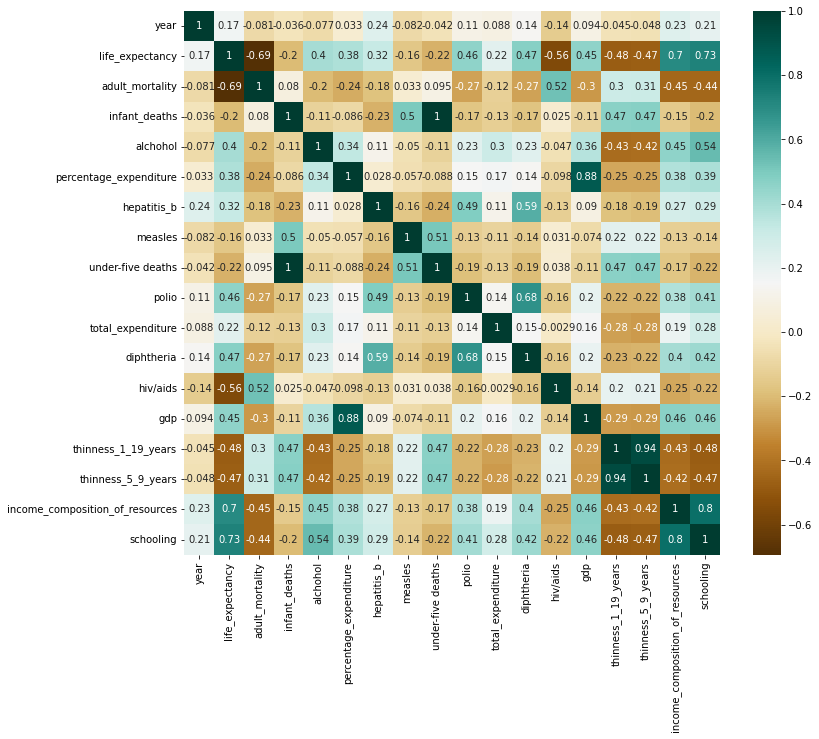

In [48]:
corr_matrix=data.corr()

plt.figure(1, figsize=(12,10))
sns.heatmap(corr_matrix, cmap='BrBG', annot=True)

corr_matrix = corr_matrix.drop('life_expectancy')
corr_matrix['life_expectancy'].abs().sort_values(ascending=False)

**Histogram**

In [49]:
data_numeric = data.select_dtypes(include='number')

column_numeric = data_numeric.columns.drop('year')

#print(column_numeric)

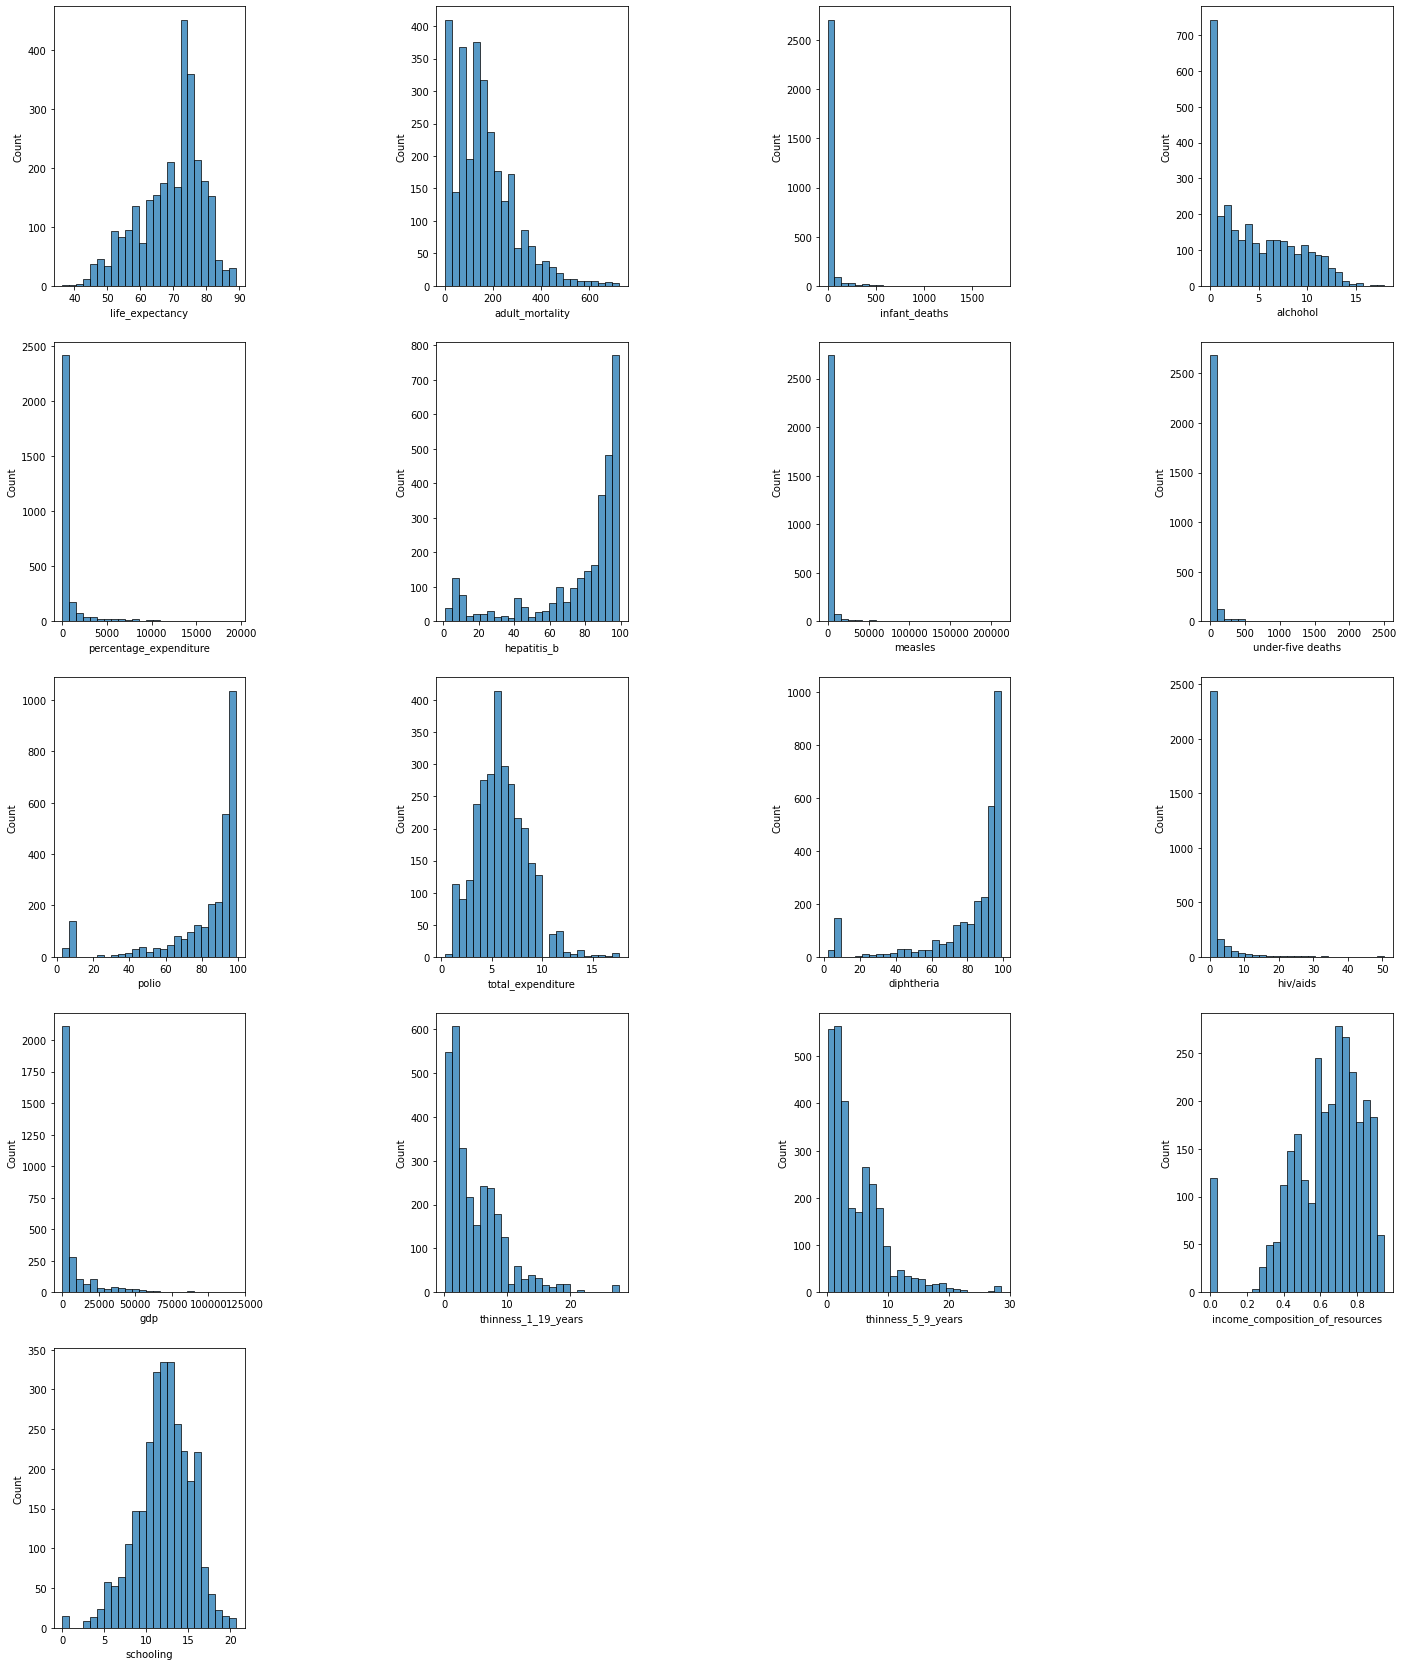

In [50]:
plt.figure(figsize=(24,36))
plt.subplots_adjust(wspace=1, hspace=None)

i = 1
for col_name in column_numeric:
    plt.subplot(6,4,i)
    sns.histplot(data = data[col_name],  bins = 25)
    i +=1

To note: The dataset is very skewed, has many outliers

**Box Plots**

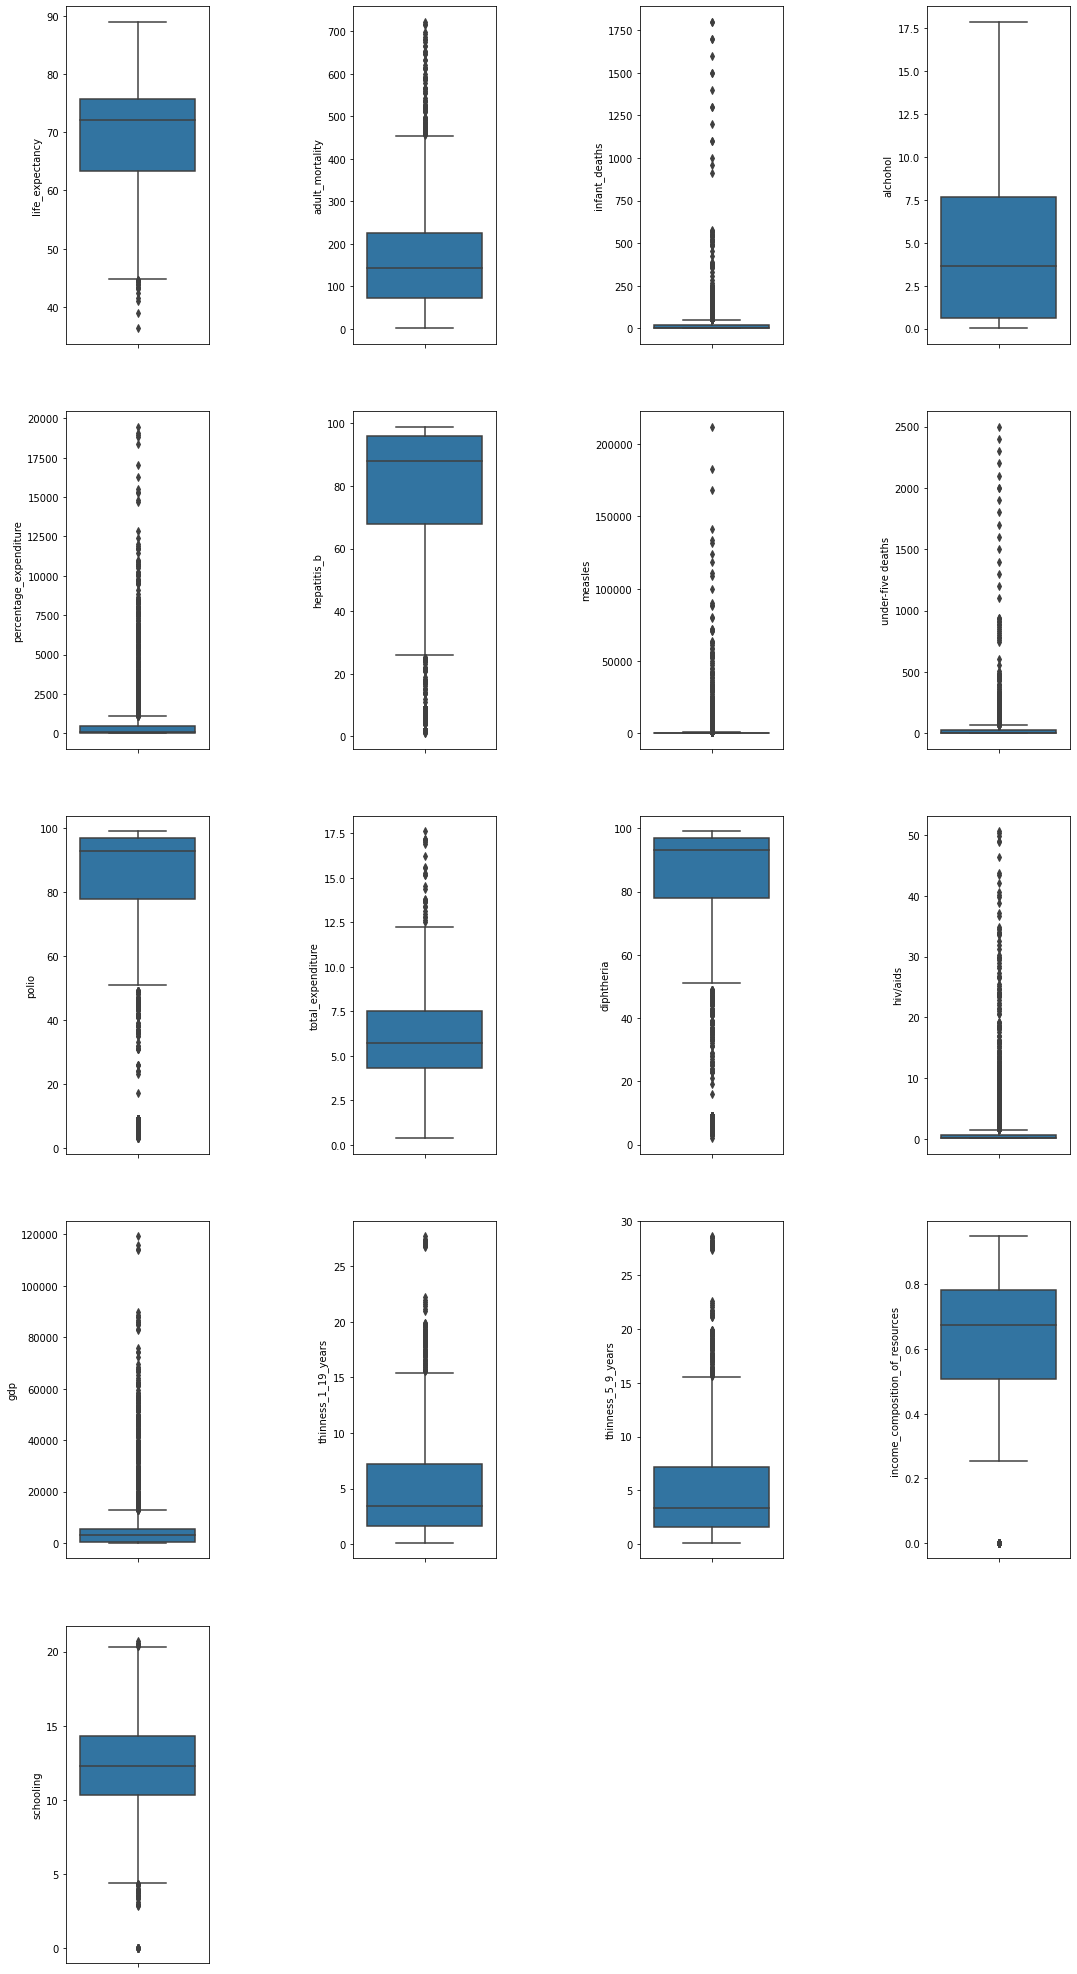

In [51]:
plt.figure(figsize=(18,36))
plt.subplots_adjust(wspace=1, hspace=None)


i = 1
for col_name in column_numeric:
    plt.subplot(5,4,i)
    sns.boxplot(data=data, y=col_name)
    i +=1

To Note: Large number of outliers

# Encoding

Encoding needs to be done only on data of one column 'status' and Label Encoding is more appropriate as the feature is ordinal

In [52]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data['class'] = labelencoder.fit_transform(data['status'])

# Outliers and Skewness

In [53]:
data.skew(axis = 0, numeric_only=True)

year                               0.00
life_expectancy                   -0.65
adult_mortality                    1.20
infant_deaths                      9.74
alchohol                           0.60
percentage_expenditure             4.63
hepatitis_b                       -1.52
measles                            9.40
under-five deaths                  9.45
polio                             -2.08
total_expenditure                  0.59
diphtheria                        -2.06
hiv/aids                           5.38
gdp                                3.34
thinness_1_19_years                1.71
thinness_5_9_years                 1.78
income_composition_of_resources   -1.14
schooling                         -0.47
class                             -1.70
dtype: float64

It seems Box-Transformation is the best way to deal with skewness(outliers too)<br>
However it requires the data to be greater than 0

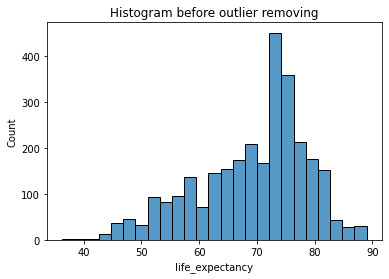

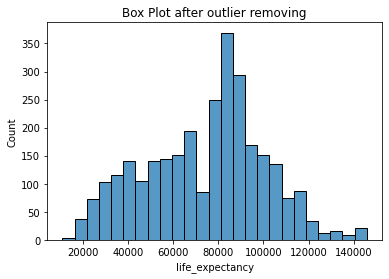

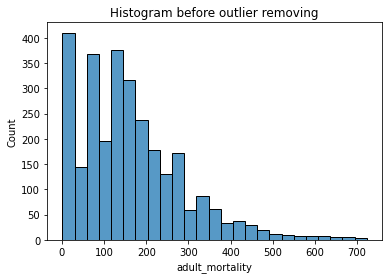

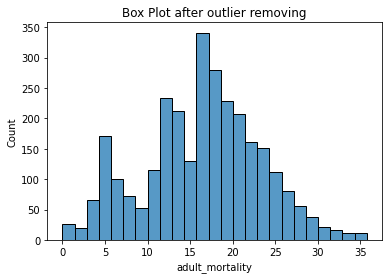

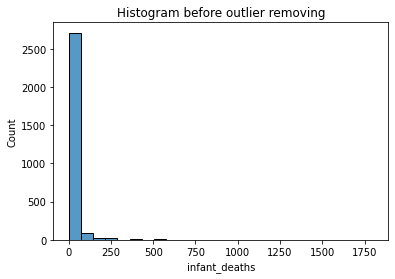

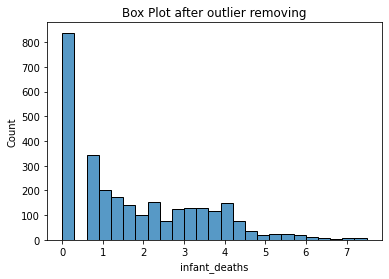

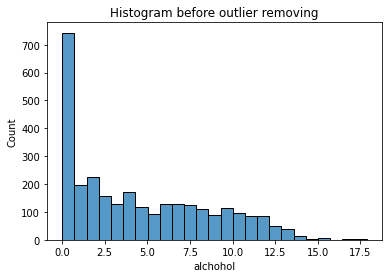

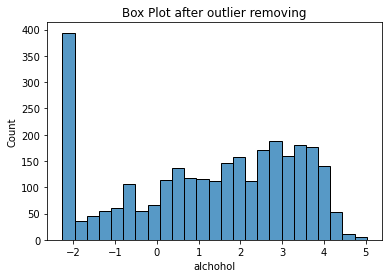

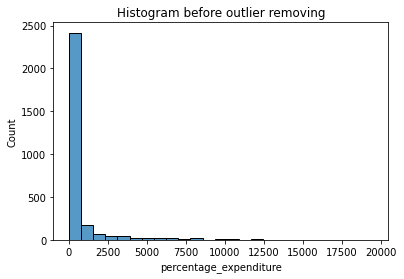

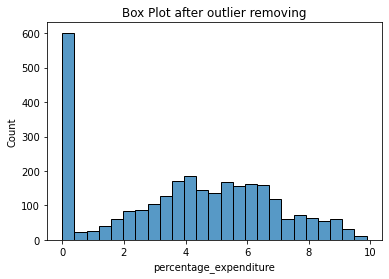

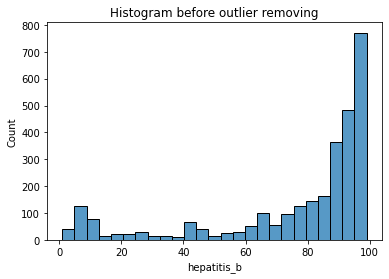

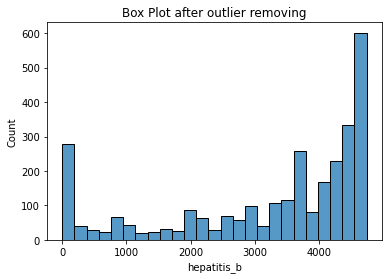

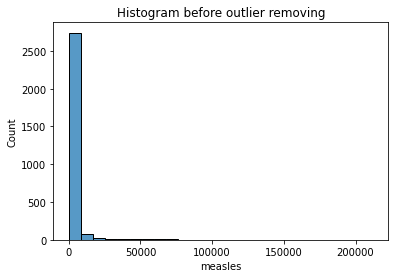

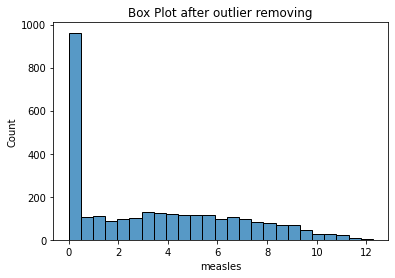

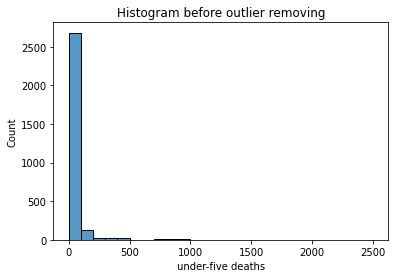

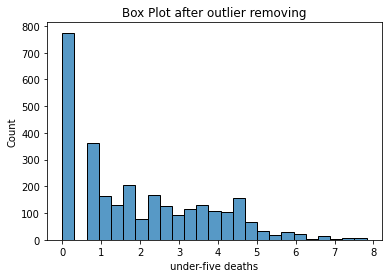

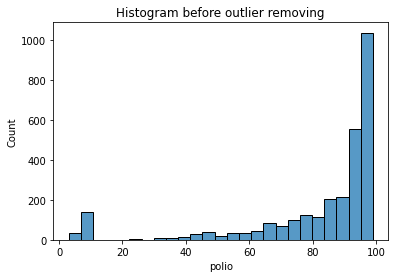

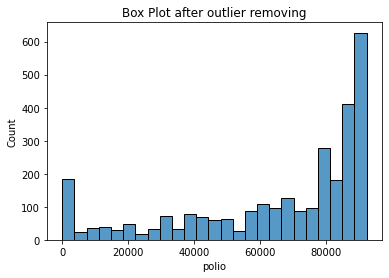

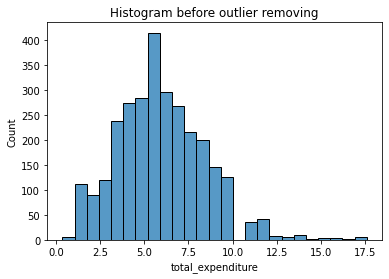

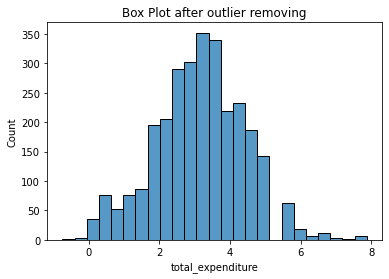

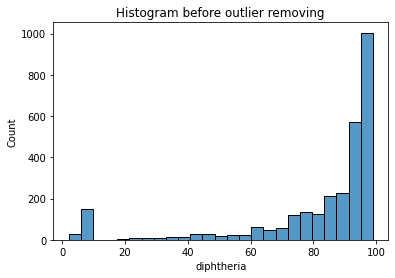

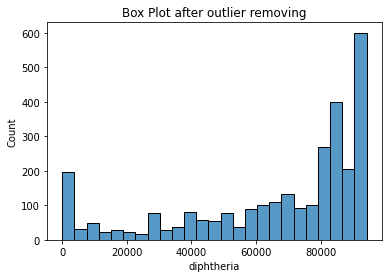

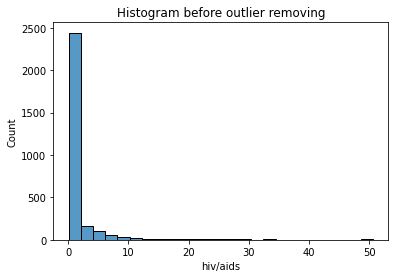

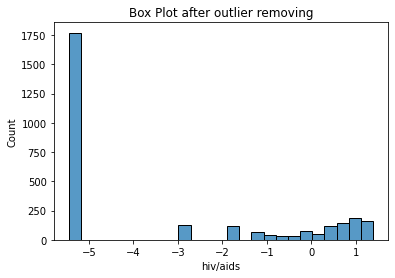

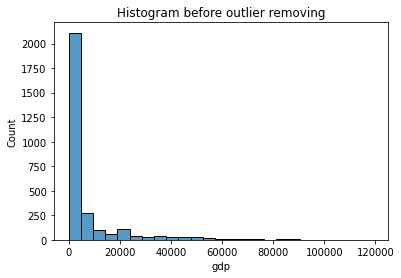

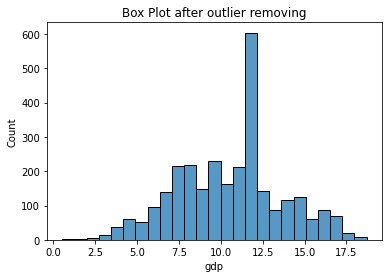

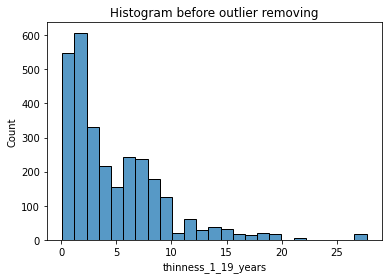

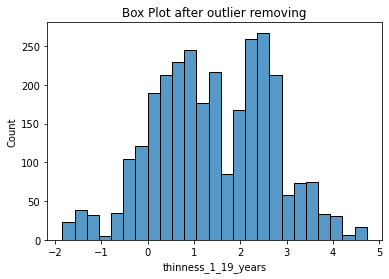

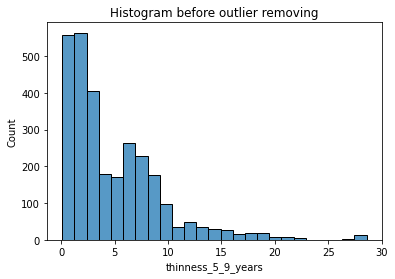

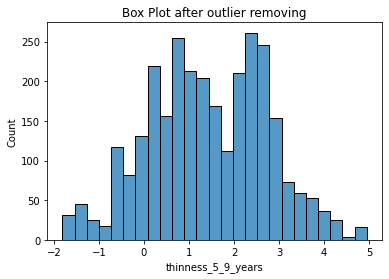

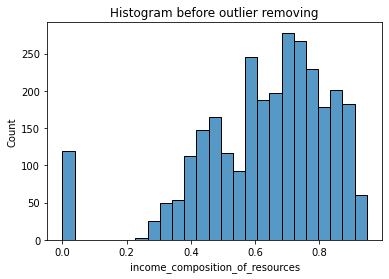

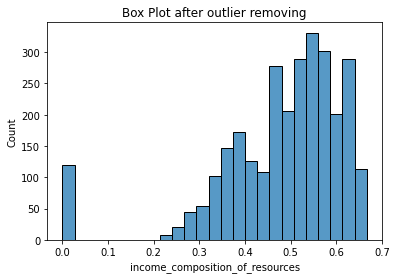

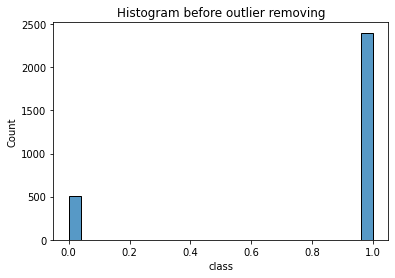

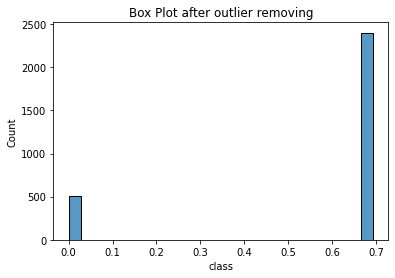

In [54]:
import scipy

for column in data.columns.drop(['country','status','year','schooling']):
    #print(column)
    sns.histplot(data = data[column],  bins = 25)
    plt.title("Histogram before outlier removing")
    plt.show()
    if ((data[column].min()>0)):
        data[column],fitted_lambda= scipy.stats.boxcox(data[column] ,lmbda=None)
    else:# using log(1+x) transformation
        data[column] = data[column] + 1
        data[column] = np.log(data[column])
    sns.histplot(data = data[column],  bins = 25)
    plt.title("Box Plot after outlier removing")
    plt.show()

In [55]:
data.skew(axis = 0, numeric_only=True)

year                               0.00
life_expectancy                   -0.10
adult_mortality                   -0.08
infant_deaths                      0.71
alchohol                          -0.39
percentage_expenditure            -0.09
hepatitis_b                       -0.98
measles                            0.55
under-five deaths                  0.66
polio                             -1.05
total_expenditure                  0.01
diphtheria                        -1.07
hiv/aids                           0.69
gdp                               -0.01
thinness_1_19_years               -0.03
thinness_5_9_years                -0.04
income_composition_of_resources   -1.66
schooling                         -0.47
class                             -1.70
dtype: float64

Wonderful

In [56]:
data.shape

(2912, 21)

# Feature Engineering
(fill null values, normalization, standardization, removing outliers)

In [57]:
data_numeric = df.select_dtypes(include='number')

column_numeric = data_numeric.columns.drop('Year')

#print(column_numeric)

In [58]:
cols = ['Life expectancy ','Adult Mortality','infant deaths', 'Alcohol','percentage expenditure', 
             'Hepatitis B','Measles ', ' BMI ','under-five deaths ', 'Polio', 'Total expenditure',
             'Diphtheria ',' HIV/AIDS', 'GDP', 'Population',
             ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'] 
for i in cols:
    q1 = df[i].quantile(0.25)
    q2 = df[i].quantile(0.75)
    iqr = q2-q1

    l = q1-1.5*iqr
    u = q2+1.5*iqr
    print(i , len(df[df[i] > u]))
    #print(df[df[i] > u])
    out1 = df[(df[i] < l)].values
    out2 = df[(df[i] > u)].values

    #df[i] = np.where(df[i]>u,u,np.where(df[i]<l,l,df[i]))


Life expectancy  0
Adult Mortality 82
infant deaths 315
Alcohol 0
percentage expenditure 389
Hepatitis B 0
Measles  542
 BMI  0
under-five deaths  394
Polio 0
Total expenditure 32
Diphtheria  0
 HIV/AIDS 542
GDP 365
Population 294
 thinness  1-19 years 89
 thinness 5-9 years 96
Income composition of resources 0
Schooling 1


In [59]:
for i in cols:
    q1 = df[i].quantile(0.25)
    q2 = df[i].quantile(0.75)
    iqr = q2-q1

    l = q1-1.5*iqr
    u = q2+1.5*iqr
    #print(i , len(df[df[i] > u]))
    #print(df[df[i] > u])
    out1 = df[(df[i] < l)].values
    out2 = df[(df[i] > u)].values

    df[i] = np.where(df[i]>u,u,np.where(df[i]<l,l,df[i]))
    print(i , len(df[df[i] > u]))


Life expectancy  0
Adult Mortality 0
infant deaths 0
Alcohol 0
percentage expenditure 0
Hepatitis B 0
Measles  0
 BMI  0
under-five deaths  0
Polio 0
Total expenditure 0
Diphtheria  0
 HIV/AIDS 0
GDP 0
Population 0
 thinness  1-19 years 0
 thinness 5-9 years 0
Income composition of resources 0
Schooling 0


In [60]:
df_num = df.drop(['Country', 'Year', 'Status'], axis = 1)

num_pipeline = Pipeline([
        #('Outlier_removal', FunctionSampler(func=remove_outlier)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('normalization', MinMaxScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_num)

In [61]:
df_cat = df[['Country','Year', 'Status']]

cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder(sparse=False)),
    ])

df_cat_tr = cat_pipeline.fit_transform(df_cat)

In [62]:
n = pd.DataFrame(df_num_tr,columns=['Life_expectancy ','Adult_Mortality','infant_deaths', 'Alcohol','percentage expenditure', 
             'Hepatitis B','Measles ', ' BMI ','under-five deaths ', 'Polio', 'Total expenditure',
             'Diphtheria ',' HIV/AIDS', 'GDP', 'Population',
             ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']  ,index=df.index )

c = pd.DataFrame(df_cat_tr)

df_final = pd.concat([n, c], axis=1)
df_final.head(10)

Life_expectancy   Adult_Mortality  infant_deaths  Alcohol  \
0              0.46             0.57           1.00     0.00   
1              0.35             0.59           1.00     0.00   
2              0.35             0.58           1.00     0.00   
3              0.34             0.59           1.00     0.00   
4              0.33             0.60           1.00     0.00   
5              0.33             0.61           1.00     0.00   
6              0.32             0.61           1.00     0.00   
7              0.31             0.62           1.00     0.00   
8              0.30             0.64           1.00     0.00   
9              0.29             0.64           1.00     0.00   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0                    0.06         0.35      1.00   0.21                1.00   
1                    0.07         0.29      0.55   0.20                1.00   
2                    0.07         0.33      0.48   0.20                1.00   
3                    0.07         0.38      1.00   0.19                1.00   
4                    0.01         0.40      1.00   0.19                1.00   
5                    0.07         0.37      1.00   0.18                1.00   
6                    0.05         0.31      1.00   0.18                1.00   
7                    0.02         0.33      1.00   0.17                1.00   
8                    0.01         0.31      1.00   0.16                1.00   
9                    0.02         0.33      1.00   0.16                1.00   

   Polio  Total expenditure  Diphtheria    HIV/AIDS  GDP  Population  \
0   0.00               0.65         0.31       0.00 0.04        1.00   
1   0.17               0.65         0.25       0.00 0.04        0.02   
2   0.25               0.65         0.29       0.00 0.04        1.00   
3   0.35               0.68         0.35       0.00 0.05        0.20   
4   0.37               0.63         0.37       0.00 0.00        0.16   
5   0.33               0.74         0.33       0.00 0.04        0.16   
6   0.27               0.76         0.27       0.00 0.03        0.02   
7   0.29               0.66         0.29       0.00 0.03        0.15   
8   0.27               0.53         0.27       0.00 0.03        1.00   
9   0.17               0.59         0.17       0.00 0.02        0.14   

    thinness  1-19 years   thinness 5-9 years  \
0                   1.00                 1.00   
1                   1.00                 1.00   
2                   1.00                 1.00   
3                   1.00                 1.00   
4                   1.00                 1.00   
5                   1.00                 1.00   
6                   1.00                 1.00   
7                   1.00                 1.00   
8                   1.00                 1.00   
9                   1.00                 1.00   

   Income composition of resources  Schooling    0    1    2    3    4    5  \
0                             0.47       0.38 1.00 0.00 0.00 0.00 0.00 0.00   
1                             0.47       0.37 1.00 0.00 0.00 0.00 0.00 0.00   
2                             0.46       0.36 1.00 0.00 0.00 0.00 0.00 0.00   
3                             0.45       0.36 1.00 0.00 0.00 0.00 0.00 0.00   
4                             0.44       0.34 1.00 0.00 0.00 0.00 0.00 0.00   
5                             0.43       0.32 1.00 0.00 0.00 0.00 0.00 0.00   
6                             0.42       0.30 1.00 0.00 0.00 0.00 0.00 0.00   
7                             0.42       0.29 1.00 0.00 0.00 0.00 0.00 0.00   
8                             0.40       0.27 1.00 0.00 0.00 0.00 0.00 0.00   
9                             0.39       0.26 1.00 0.00 0.00 0.00 0.00 0.00   

     6    7    8    9   10   11   12   13   14   15   16   17   18   19   20  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.0

# Data Split and Feature Selection

Our aim was to predict the life expectancy with given data

Bring life_expectancy to the last column

In [63]:
from sklearn.feature_selection import mutual_info_regression

In [64]:
x = df_final.drop('Life_expectancy ',axis='columns')
y = df_final['Life_expectancy ']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [65]:
pipeline_sgd=Pipeline([('SGD', SGDRegressor(learning_rate = 'adaptive'))])

pipeline_svm=Pipeline([('SVM', SVR())])

pipeline_forest=Pipeline([('Random_forest', RandomForestRegressor())])

In [66]:
pipelines = [pipeline_sgd, pipeline_svm, pipeline_forest]
pipe_dict = {0: 'SGD', 1: 'SVM', 2: 'Random_forest'}

In [67]:
for pipe in pipelines:
    pipe.fit(X_train, y_train);
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)));

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SGD Test Accuracy: 0.9229040587496476
SVM Test Accuracy: 0.9052818167947708
Random_forest Test Accuracy: 0.9649973947915371


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [68]:
print(SGDRegressor().get_params().keys())
print(SVR().get_params().keys())
print(RandomForestRegressor().get_params().keys())

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])
dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


param_grid = [
{
#"n_estimators":[10,100,1000],
"max_depth":[5,8,15,25,30,None], 
#"min_samples_leaf":[1,2,5,10,15,100],
"max_leaf_nodes": [2, 5,10]
 },
    
 {
"max_depth":[5,8,15,25,30,None], 
"min_samples_leaf":[1,2,5,10,15,100], 
 }
 ]

forest_reg = RandomForestRegressor()

gridsearch = GridSearchCV(forest_reg, param_grid, cv=5, verbose=1,n_jobs=-1,  return_train_score=True) 
best_model = gridsearch.fit(X_train,y_train)
best_model.score(X_test,y_test)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

0.9637315851891847

In [70]:
print(gridsearch.score(X_test,y_test))
print(best_model.best_params_)

0.9637315851891847
{'max_depth': 30, 'min_samples_leaf': 1}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [71]:
cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.5861207029835172 {'max_depth': 5, 'max_leaf_nodes': 2}
0.8148444186385714 {'max_depth': 5, 'max_leaf_nodes': 5}
0.8832784498010169 {'max_depth': 5, 'max_leaf_nodes': 10}
0.587119756119929 {'max_depth': 8, 'max_leaf_nodes': 2}
0.8153671468332246 {'max_depth': 8, 'max_leaf_nodes': 5}
0.8827133409068034 {'max_depth': 8, 'max_leaf_nodes': 10}
0.5874889351610342 {'max_depth': 15, 'max_leaf_nodes': 2}
0.8165578765548286 {'max_depth': 15, 'max_leaf_nodes': 5}
0.8822872395421084 {'max_depth': 15, 'max_leaf_nodes': 10}
0.5876568235456734 {'max_depth': 25, 'max_leaf_nodes': 2}
0.8139415097387575 {'max_depth': 25, 'max_leaf_nodes': 5}
0.8827621698449741 {'max_depth': 25, 'max_leaf_nodes': 10}
0.5882667652886144 {'max_depth': 30, 'max_leaf_nodes': 2}
0.813950215455846 {'max_depth': 30, 'max_leaf_nodes': 5}
0.8823672616439999 {'max_depth': 30, 'max_leaf_nodes': 10}
0.58762854610066 {'max_depth': None, 'max_leaf_nodes': 2}
0.8156836142626915 {'max_depth': None, 'max_leaf_nodes': 5}
0.8819639627531

In [72]:
feature_importances = gridsearch.best_estimator_.feature_importances_

In [73]:
from sklearn.ensemble import BaggingRegressor

model = RandomForestRegressor(max_depth = 25, min_samples_leaf =  1)


bgregressor = BaggingRegressor(base_estimator=model, n_estimators=1200,
                                 max_features=220,
                                 max_samples=200,
                                 random_state=1, n_jobs=5)


bgregressor.fit(X_train, y_train)

print('Model test Score: %.3f, ' %bgregressor.score(X_test, y_test),
      'Model training Score: %.3f' %bgregressor.score(X_train, y_train))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

Model test Score: 0.914,  Model training Score: 0.919


## Another Models

In [74]:
y = data['life_expectancy']
data.drop('life_expectancy', axis=1, inplace=True)
data = data.join(y)

Dropping object datatype columns(already encoded or deemed useless

In [75]:
for column in data:
    if ((data[column].dtype == 'object')):
        print(column)
        data.drop(column, axis=1, inplace=True)

country
status


In [76]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.33, shuffle = True, random_state = 96)

In [77]:
X_train = train.iloc[:,0:-1].to_numpy()
y_train = train.iloc[:,-1].to_numpy()

X_test = test.iloc[:,0:-1].to_numpy()
y_test = test.iloc[:,-1].to_numpy()

In [78]:
print("Dimension of Train set as of now is ",X_train.shape)

Dimension of Train set as of now is  (1951, 18)


In [79]:
#X = data.iloc[:,0:-1].to_numpy()
#y = data.iloc[:,-1].to_numpy()

In [80]:
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

#mutual_info_regression(X_train,y_train)

#print(X_train.shape)

#best_feat = SelectKBest(mutual_info_regression, k=15)

#X = SelectKBest(mutual_info_regression, k=12).fit_transform(X,y)

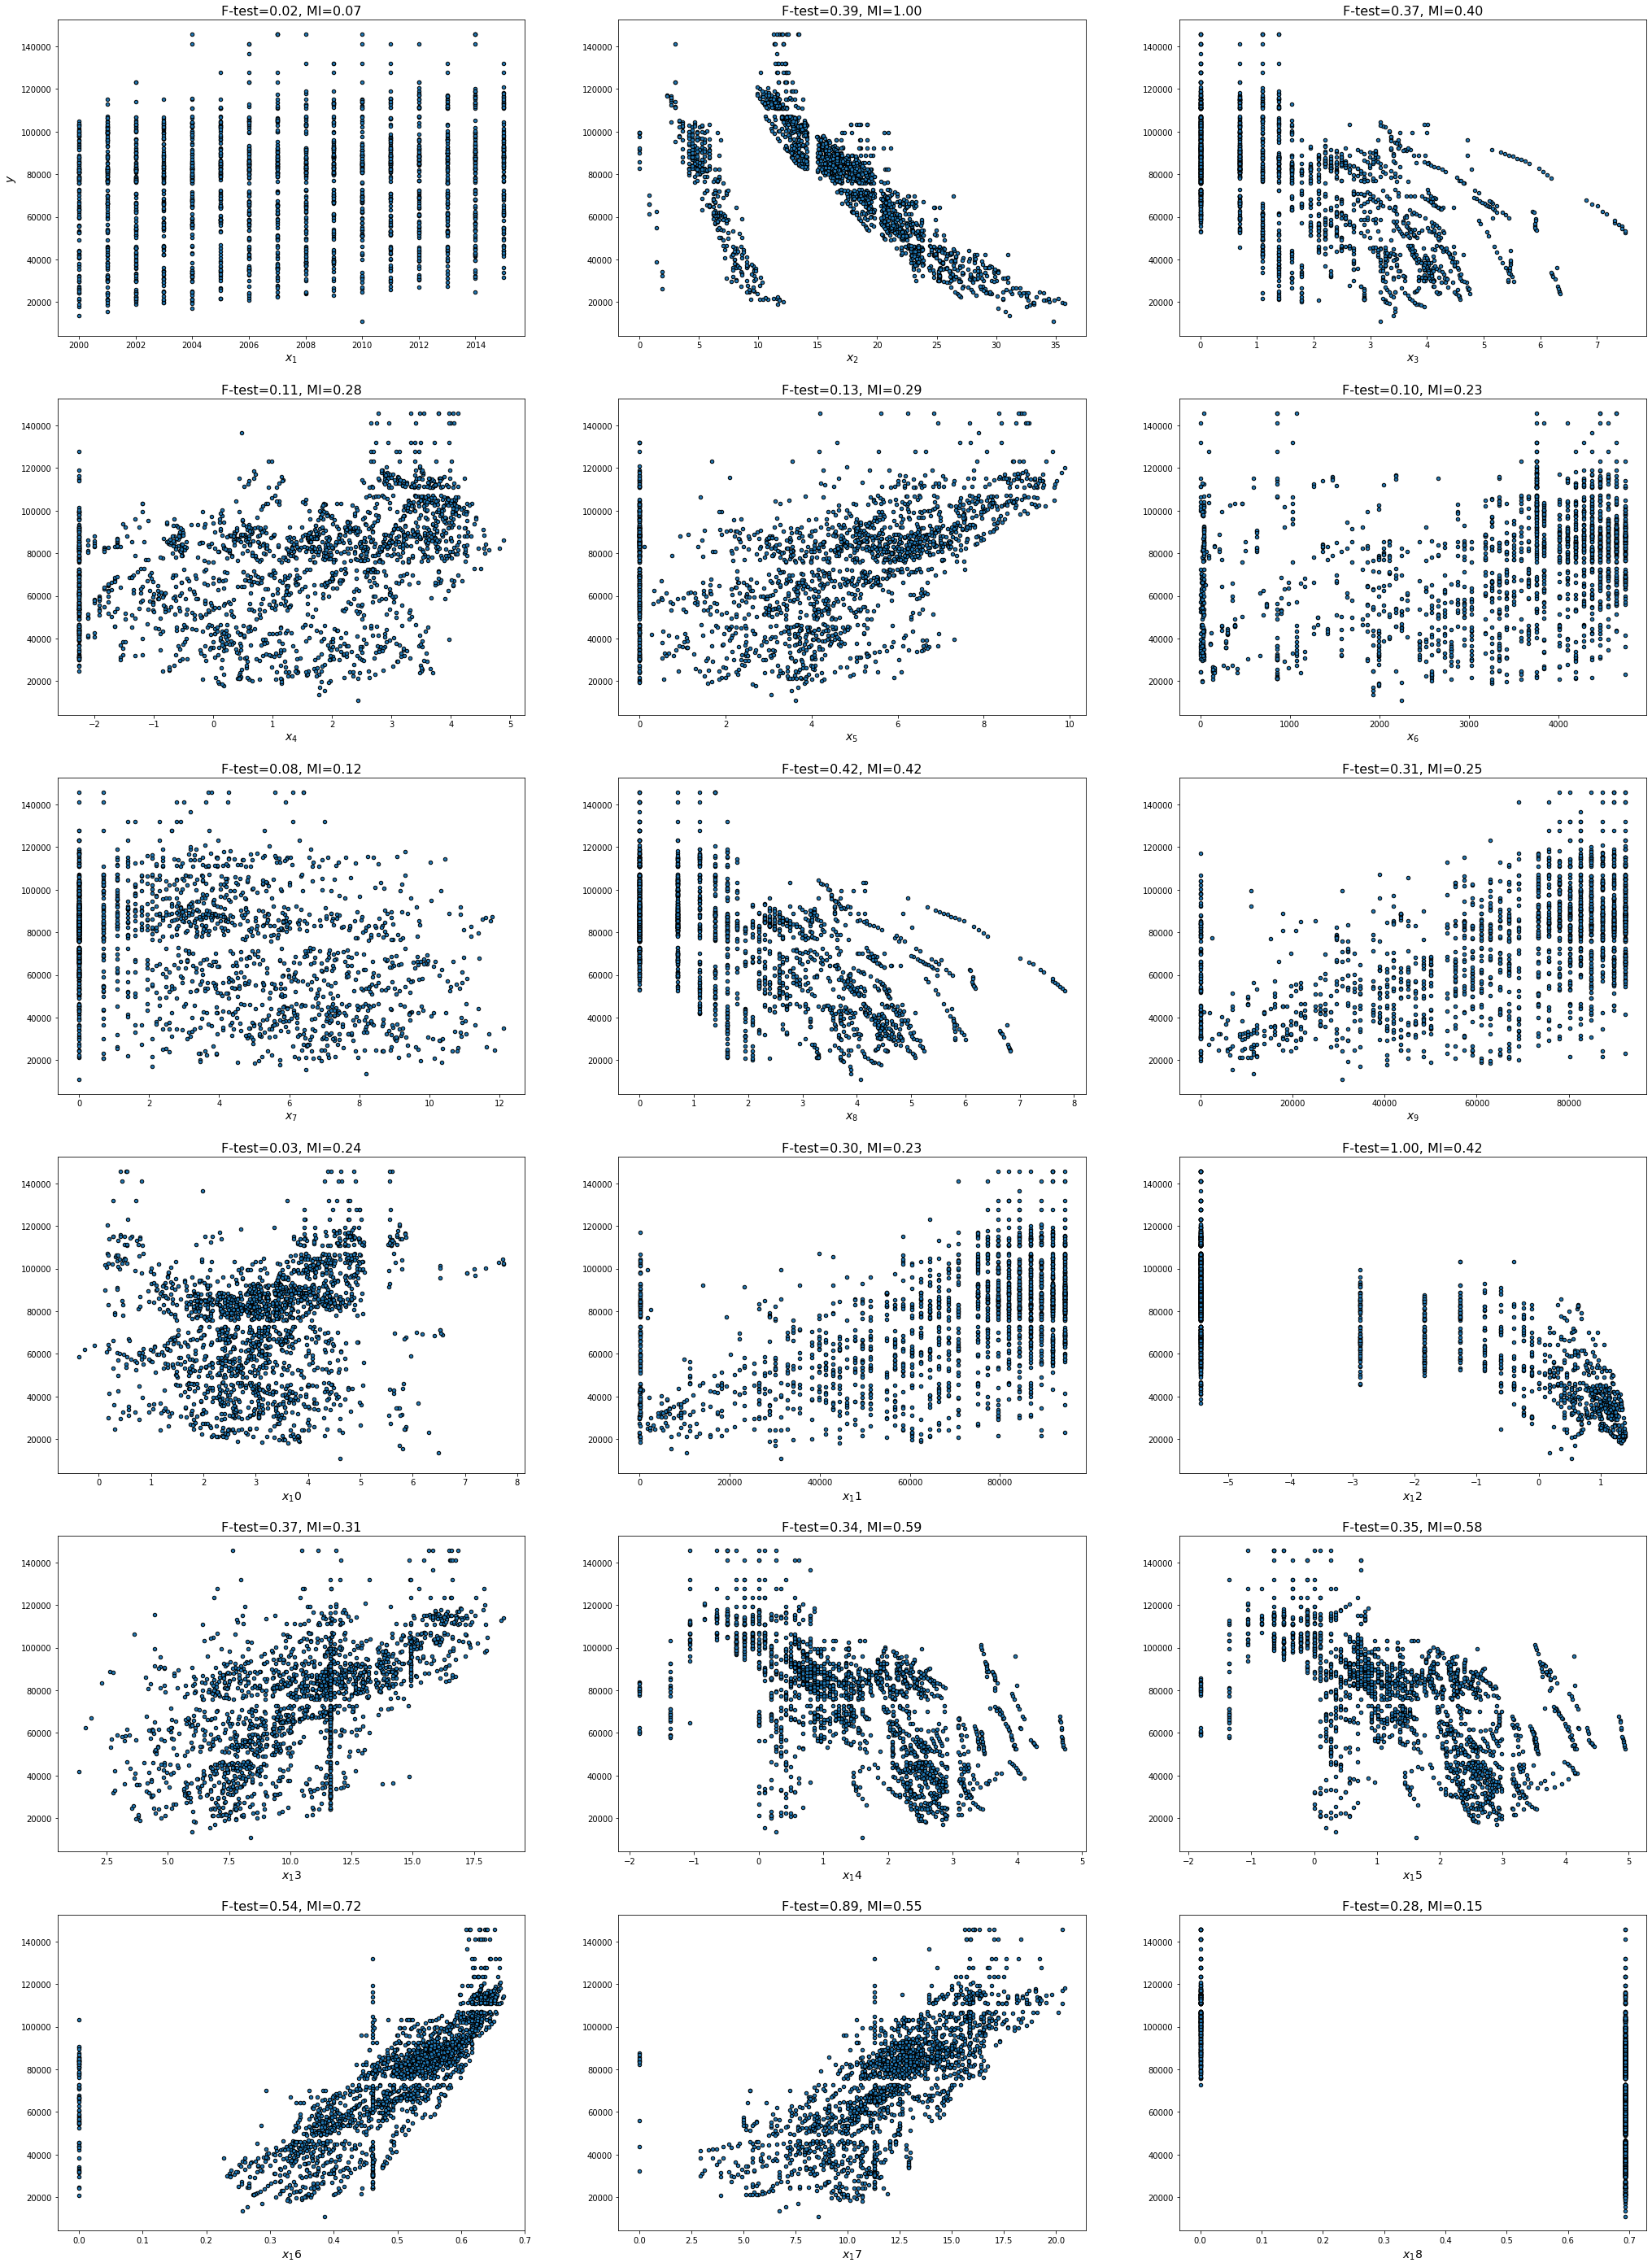

In [81]:
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)


plt.figure(figsize=(35,50))
for i in range(18):
    plt.subplot(6, 3, i + 1)
    plt.scatter(X_train[:, i], y_train, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()

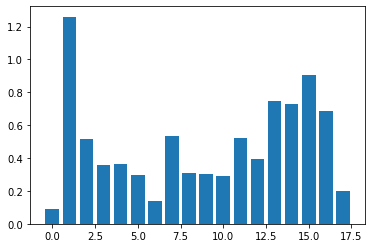

In [82]:
def select_features_mi(X_train, y_train, X_test):
    features = SelectKBest(score_func = mutual_info_regression, k= 16)
    features.fit(X_train, y_train)
    X_train_fs = features.transform(X_train)
    X_test_fs = features.transform(X_test)
    return X_train_fs, X_test_fs, features

X_train_fs, X_test_fs, feature_list_mi = select_features_mi(X_train, y_train, X_test)

for i in range(len(feature_list_mi.scores_)):
    pass
    #print('Feature %d: %f' % (i, feature_list_mi.scores_[i]))
plt.bar([i for i in range(len(feature_list_mi.scores_))], feature_list_mi.scores_)
plt.show()

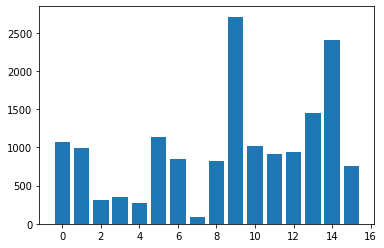

In [83]:
def select_features_f(X_train, y_train, X_test):
    features = SelectKBest(score_func = f_regression, k= 15)
    features.fit(X_train, y_train)
    X_train_fs = features.transform(X_train)
    X_test_fs = features.transform(X_test)
    return X_train_fs, X_test_fs, features

X_train_fs, X_test_fs, feature_list_f = select_features_f(X_train_fs, y_train, X_test_fs)

for i in range(len(feature_list_f.scores_)):
    pass
    #print('Feature %d: %f' % (i, feature_list_f.scores_[i]))
plt.bar([i for i in range(len(feature_list_f.scores_))], feature_list_f.scores_)
plt.show()

In [84]:
from sklearn.utils import shuffle

train = shuffle(train)
test = shuffle(test)

In [85]:
print("Dimension of Train set prior to feature selection ",X_train.shape)

Dimension of Train set prior to feature selection  (1951, 18)


In [86]:
X_train = X_train_fs
X_test = X_test_fs

In [87]:
print("Dimension of Train set after to feature selection ",X_train.shape)

Dimension of Train set after to feature selection  (1951, 15)


# Modelling

In [88]:
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [90]:
from sklearn.model_selection import GridSearchCV

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [91]:
from sklearn.pipeline import make_pipeline

**Linear Regression**

In [92]:
import math

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [94]:
linear_reg_model = lr.fit(X_train,y_train)

y_train_pred = linear_reg_model.predict(X_train)
y_test_pred = linear_reg_model.predict(X_test)

print("The training R^2 score for linear model ",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for linear model ",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for linear model  0.8127486663515229

The training RMSE score for linear model  11276.058885825101


No hyperparameters here

**Ridge**

In [95]:
from sklearn.linear_model import Ridge

ridge = Ridge()

param_grid = {
            "alpha": [1e0, 0.1, 1e-2, 1e-3],
            'tol': [1]
             }
grid = HalvingGridSearchCV(ridge, param_grid, refit = True, verbose = -1, n_jobs=-1, return_train_score = True)

ridge_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_) 

#print(grid.refit_time_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 650
max_resources_: 1951
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 650
----------
iter: 1
n_candidates: 2
n_resources: 1950
{'alpha': 0.1, 'tol': 1}


In [96]:
y_train_pred = ridge_best_model.predict(X_train)
y_test_pred = ridge_best_model.predict(X_test)

print("The training R^2 score for best Ridge Regression model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Ridge Regression model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Ridge Regression model is 0.8127476752265552

The training RMSE score for best Ridge Regression model is 11276.08872798561


**Lasso**

In [97]:
from sklearn.linear_model import Lasso

lasso = Lasso()

param_grid = {
            "alpha": [1e0, 0.1, 1e-2, 1e-3],
            'tol': [1]
             }
grid = HalvingGridSearchCV(lasso, param_grid, refit = True, verbose = -1, n_jobs=-1, return_train_score = True)

lasso_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_) 

#print(grid.refit_time_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 650
max_resources_: 1951
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 650
----------
iter: 1
n_candidates: 2
n_resources: 1950
{'alpha': 1.0, 'tol': 1}


In [98]:
y_train_pred = lasso_best_model.predict(X_train)
y_test_pred = lasso_best_model.predict(X_test)

print("The training R^2 score for best Lasso Regression model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Lasso Regression model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Lasso Regression model is 0.7437838663940878

The training RMSE score for best Lasso Regression model is 13190.100725761778


**Polynomial Regression**

In [99]:
from sklearn.preprocessing import PolynomialFeatures

for alpha in range(1,4):
    
    polynomial_regressor = PolynomialFeatures(degree = alpha)
    
    X_poly_train = polynomial_regressor.fit_transform(X_train)
    X_poly_test = polynomial_regressor.fit_transform(X_test)
    
    poly_reg_model = LinearRegression().fit(X_poly_train,y_train)
    
    y_train_pred = poly_reg_model.predict(X_poly_train)
    y_test_pred = poly_reg_model.predict(X_poly_test)

    train_score = math.sqrt(mean_squared_error(y_train_pred,y_train))
    test_score = math.sqrt(mean_squared_error(y_test_pred,y_test))

    print("The training R^2 score for polynomial model with degree ",alpha, "is",r2_score(y_train, y_train_pred))
    print("The test R^2 score for polynomial model with degree ",alpha, "is",r2_score(y_test, y_test_pred))
    print()
    print("The training RMSE score for polynomial model with degree ",alpha, "is",math.sqrt(mean_squared_error(y_train_pred,y_train)))
    print("The test RMSE score for polynomial model with degree ",alpha, "is",math.sqrt(mean_squared_error(y_test_pred,y_test)))
    print()
    if (alpha == 1):
        print("Basically Linear Regression")
        print()

The training R^2 score for polynomial model with degree  1 is 0.8127486663515229
The test R^2 score for polynomial model with degree  1 is 0.8178884278790404

The training RMSE score for polynomial model with degree  1 is 11276.058885825101
The test RMSE score for polynomial model with degree  1 is 11462.417842602079

Basically Linear Regression

The training R^2 score for polynomial model with degree  2 is 0.9175171588537806
The test R^2 score for polynomial model with degree  2 is -3.5862695373094236e+19

The training RMSE score for polynomial model with degree  2 is 7483.877693907059
The test RMSE score for polynomial model with degree  2 is 160852912053866.12

The training R^2 score for polynomial model with degree  3 is 0.9689536058843987
The test R^2 score for polynomial model with degree  3 is -288802189828035.25

The training RMSE score for polynomial model with degree  3 is 4591.4563355459795
The test RMSE score for polynomial model with degree  3 is 456465233292.2549



Well, it appears that polynomial of degree 1 works fine<br>
However, higher degree give trash result

In [100]:
polynomial_regressor = PolynomialFeatures(degree = 1)
    
X_poly_train = polynomial_regressor.fit_transform(X_train)
X_poly_test = polynomial_regressor.fit_transform(X_test)

poly_reg_model = LinearRegression().fit(X_poly_train,y_train)

**K Nearest Neighbours**

In [101]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

param_grid = {
            'n_neighbors':[1,2,3,4,5,6,7,8,9],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p':[1,2],
             }
grid = HalvingGridSearchCV(knn, param_grid, refit = True, verbose = -1, n_jobs=-1, return_train_score = True)

knn_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_) 

#print(grid.refit_time_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 24
max_resources_: 1951
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 144
n_resources: 24
----------
iter: 1
n_candidates: 48
n_resources: 72
----------
iter: 2
n_candidates: 16
n_resources: 216
----------
iter: 3
n_candidates: 6
n_resources: 648
----------
iter: 4
n_candidates: 2
n_resources: 1944
{'algorithm': 'kd_tree', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


In [102]:
y_train_pred = knn_best_model.predict(X_train)
y_test_pred = knn_best_model.predict(X_test)

print("The training R^2 score for best KNN model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best KNN model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best KNN model is 1.0

The training RMSE score for best KNN model is 0.0


**Kernel Ridge Regression**

In [103]:
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge()

param_grid = {
            "alpha": [1e0, 0.1, 1e-2, 1e-3], 
            "gamma": np.logspace(-2, 2, 5),
            "degree": [3, 5, 7, 9]
             }
grid = HalvingGridSearchCV(krr, param_grid, refit = True, verbose = -1, n_jobs=-1, return_train_score = True)

krr_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_) 

#print(grid.refit_time_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 72
max_resources_: 1951
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 80
n_resources: 72
----------
iter: 1
n_candidates: 27
n_resources: 216
----------
iter: 2
n_candidates: 9
n_resources: 648
----------
iter: 3
n_candidates: 3
n_resources: 1944
{'alpha': 1.0, 'degree': 5, 'gamma': 1.0}


In [104]:
y_train_pred = krr_best_model.predict(X_train)
y_test_pred = krr_best_model.predict(X_test)

print("The training R^2 score for best Kernel Ridge model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Kernel Ridge model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Kernel Ridge model is -7.28159148691805

The training RMSE score for best Kernel Ridge model is 74989.72782867817


# # # Note: Model perform badly when shuffle is off

**SVM**

In [105]:
from sklearn.svm import SVR

svr = SVR()

param_grid = {
              'kernel': ['linear','poly', 'rbf', 'sigmoid'],
              'C': [10000,50000,100000,500000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              }
grid = HalvingGridSearchCV(svr, param_grid, refit = True, verbose = -1,n_jobs=-1)

svr_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_) 

#print(grid.refit_time_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 72
max_resources_: 1951
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 32
n_resources: 72
----------
iter: 1
n_candidates: 11
n_resources: 216
----------
iter: 2
n_candidates: 4
n_resources: 648
----------
iter: 3
n_candidates: 2
n_resources: 1944
{'C': 100000, 'gamma': 'scale', 'kernel': 'rbf'}


In [106]:
y_train_pred = svr_best_model.predict(X_train)
y_test_pred = svr_best_model.predict(X_test)

print("The training R^2 score for best SVM model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best SVM model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best SVM model is 0.9526227318860632

The training RMSE score for best SVM model is 5671.917205915255


**Decision Tree Regressor**

In [107]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

param_grid = {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'max_depth' : [3,7,11,15,19],
            'min_weight_fraction_leaf':[0.0005,0.001,0.005],
            'max_features':['auto','log2','sqrt',None],
             }
grid = HalvingGridSearchCV(dtr, param_grid, refit = True, verbose = -1,n_jobs=-1, error_score = 'raise')

dtr_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_) 

#print(grid.refit_time_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 24
max_resources_: 1951
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 240
n_resources: 24
----------
iter: 1
n_candidates: 80
n_resources: 72
----------
iter: 2
n_candidates: 27
n_resources: 216
----------
iter: 3
n_candidates: 9
n_resources: 648
----------
iter: 4
n_candidates: 3
n_resources: 1944
{'criterion': 'squared_error', 'max_depth': 11, 'max_features': 'auto', 'min_weight_fraction_leaf': 0.005}


In [108]:
y_train_pred = dtr_best_model.predict(X_train)
y_test_pred = dtr_best_model.predict(X_test)

print("The training R^2 score for best Decision Tree model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Decision Tree model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Decision Tree model is 0.9562130563246539

The training RMSE score for best Decision Tree model is 5452.770154683497


**Random Forest Regressor**

In [109]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

param_grid = param_grid = {
        'criterion': ['squared_error', 'absolute_error', 'poisson'],
        'max_depth': [100, 110],
        'max_features': [4, 5],
        'min_samples_leaf': [2, 4],
        'min_samples_split': [6],
        'n_estimators': [500,1000]
}
grid = HalvingGridSearchCV(rfr, param_grid, refit = True, verbose = -1,n_jobs=-1)

rfr_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_)

#print(grid.refit_time_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 72
max_resources_: 1951
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 48
n_resources: 72
----------
iter: 1
n_candidates: 16
n_resources: 216
----------
iter: 2
n_candidates: 6
n_resources: 648
----------
iter: 3
n_candidates: 2
n_resources: 1944
{'criterion': 'squared_error', 'max_depth': 100, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 1000}


In [110]:
y_train_pred = rfr_best_model.predict(X_train)
y_test_pred = rfr_best_model.predict(X_test)

print("The training R^2 score for best Random Forest model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Random Forest model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Random Forest model is 0.9841897643078567

The training RMSE score for best Random Forest model is 3276.5292366241083


**Gradient Boost Regressor**

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

param_grid = {
                'learning_rate': [0.008,0.01,0.03],
                'subsample'    : [0.8, 0.5, 0.3],
                'n_estimators' : [500,1000],
                'max_depth'    : [6,8,12,14]
             }
grid = HalvingGridSearchCV(gbr, param_grid, refit = True, verbose = -1,n_jobs=-1)

gbr_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_)

#print(grid.refit_time_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 72
max_resources_: 1951
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 72
----------
iter: 1
n_candidates: 24
n_resources: 216
----------
iter: 2
n_candidates: 8
n_resources: 648
----------
iter: 3
n_candidates: 3
n_resources: 1944
{'learning_rate': 0.03, 'max_depth': 14, 'n_estimators': 500, 'subsample': 0.5}


In [112]:
y_train_pred = gbr_best_model.predict(X_train)
y_test_pred = gbr_best_model.predict(X_test)

print("The training R^2 score for best Gradient Boost model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Gradient Boost model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))
print()

The training R^2 score for best Gradient Boost model is 0.9999946325771504

The training RMSE score for best Gradient Boost model is 60.37091813442508



**Bagging Regressor**

In [113]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor()

param_grid = {
             #'base_estimator__max_depth' : [1, 2, 3, 4, 5],
             'max_samples' : [0.05, 0.1, 0.2, 0.5]
             }
grid = HalvingGridSearchCV(br, param_grid, refit = True, verbose = -1,n_jobs=-1)

br_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_)

#print(grid.refit_time_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 650
max_resources_: 1951
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 650
----------
iter: 1
n_candidates: 2
n_resources: 1950
{'max_samples': 0.5}


In [114]:
y_train_pred = br_best_model.predict(X_train)
y_test_pred = br_best_model.predict(X_test)

print("The training R^2 score for best Bagging Regressor model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Bagging Regressor model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))
print()

The training R^2 score for best Bagging Regressor model is 0.9743010079991382

The training RMSE score for best Bagging Regressor model is 4177.369774044027



**Multi Layer Perceptron (Neural Networks)**

In [115]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()

param_grid = {
                "alpha": [1 ,10, 100],
                'learning_rate_init': [0.01,0.05],
                'max_iter': [2000],
                'tol': [0.5],
             }
grid = HalvingGridSearchCV(mlp, param_grid, refit = True, verbose = -1,n_jobs=-1)

mlp_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_)

#print(grid.refit_time_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 650
max_resources_: 1951
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 6
n_resources: 650
----------
iter: 1
n_candidates: 2
n_resources: 1950
{'alpha': 100, 'learning_rate_init': 0.05, 'max_iter': 2000, 'tol': 0.5}


In [116]:
y_train_pred = mlp_best_model.predict(X_train)
y_test_pred = mlp_best_model.predict(X_test)

print("The training R^2 score for best Neural Network model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Neural Network model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))
print()

The training R^2 score for best Neural Network model is 0.8864343791179545

The training RMSE score for best Neural Network model is 8781.49210505568



In [117]:
models = []

models.append(('Linear Regression', linear_reg_model))
models.append(('Ridge(Linear) Regression', ridge_best_model))
models.append(('Lasso(Linear) Regression', lasso_best_model))
models.append(('Polynomial Regression', poly_reg_model))
models.append(('K Nearest Neighbour', knn_best_model))
#models.append(('Kernel Ridge Regression', krr_best_model))
models.append(('Support Vector', svr_best_model))
models.append(('Decision Tree', dtr_best_model))
models.append(('Random Forest', rfr_best_model))
models.append(("Gradient Boost", gbr_best_model))
models.append(("Bagging Regressor", br_best_model))
models.append(("Neural Network", mlp_best_model))


model_name = []
RMSE = []
R2 = []

Y_TEST_PRED = []

    
for name, model in models:
    if (name == 'Polynomial Regression'):
        model_name.append(name)
        y_test_pred = model.predict(X_poly_test)
        rmse = math.sqrt(mean_squared_error(y_test_pred,y_test))
        r2 = r2_score(y_test, y_test_pred)

        RMSE.append(rmse)
        R2.append(r2)
        Y_TEST_PRED.append(y_test_pred)
    else:
        model_name.append(name)
        y_test_pred = model.predict(X_test)
        rmse = math.sqrt(mean_squared_error(y_test_pred,y_test))
        r2 = r2_score(y_test, y_test_pred)
        
        RMSE.append(rmse)
        R2.append(r2)
        Y_TEST_PRED.append(y_test_pred)
        
model_score = pd.DataFrame(zip(model_name, RMSE, R2) , columns=['Name', 'RMSE','R2'])

model_score = model_score.sort_values(by='RMSE', ascending=False)

#print(model_score.sort_values(by=['RMSE']))
model_score

Name     RMSE   R2
2   Lasso(Linear) Regression 13655.18 0.74
0          Linear Regression 11462.42 0.82
3      Polynomial Regression 11462.42 0.82
1   Ridge(Linear) Regression 11461.37 0.82
10            Neural Network  9779.23 0.87
6              Decision Tree  8069.96 0.91
5             Support Vector  7151.24 0.93
4        K Nearest Neighbour  6979.93 0.93
9          Bagging Regressor  6914.92 0.93
7              Random Forest  6134.89 0.95
8             Gradient Boost  5805.07 0.95

<BarContainer object of 11 artists>

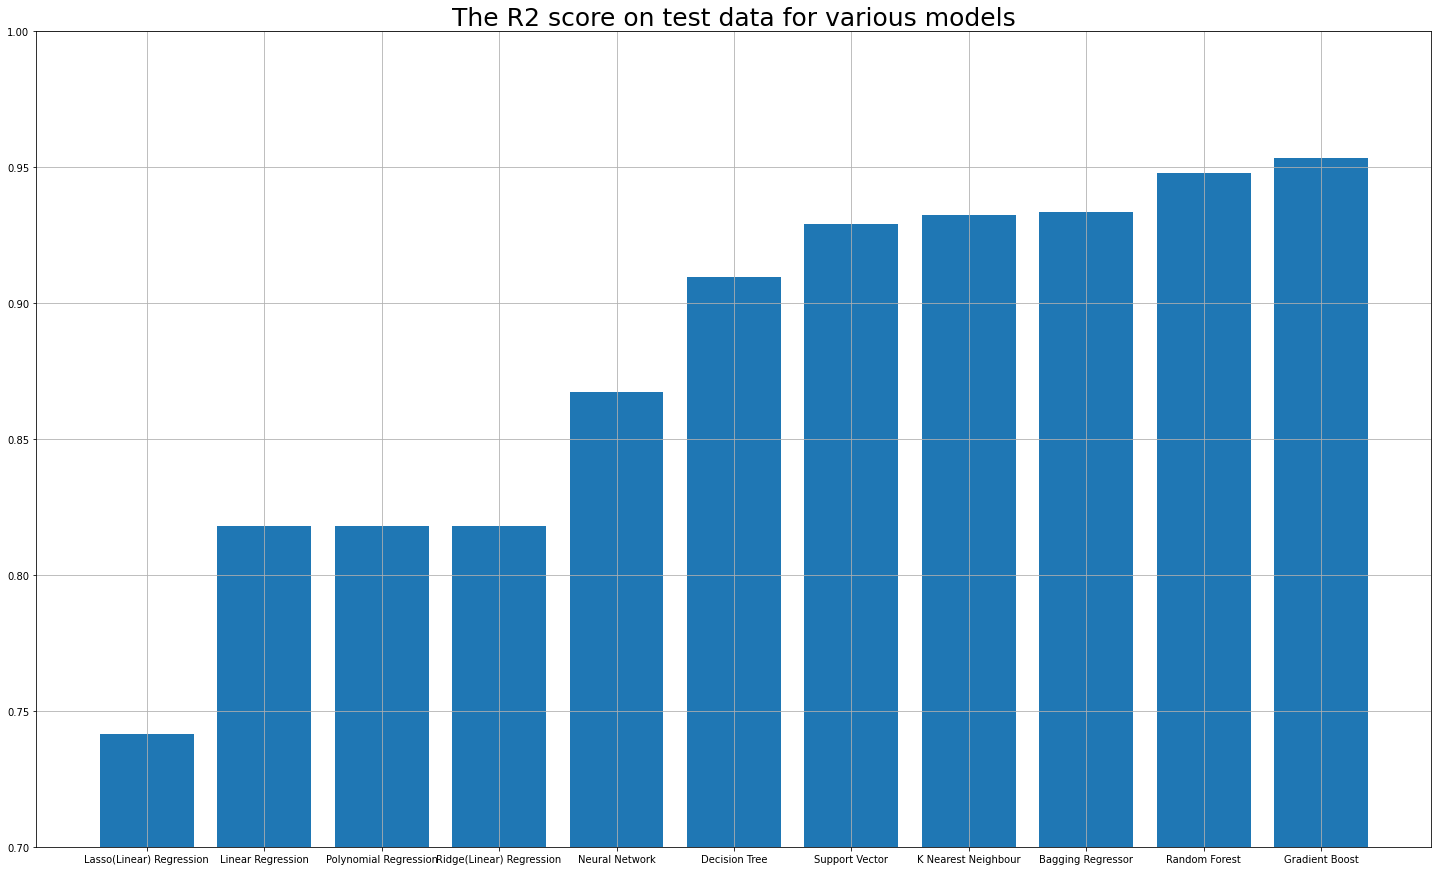

In [118]:
name = model_score['Name']
rmse = model_score['RMSE']
r2 = model_score['R2']

fig = plt.figure(figsize =(25, 15))

plt.ylim(0.7, 1.0)
plt.grid()
plt.title("The R2 score on test data for various models", {'fontsize': 25})

plt.bar(name, r2)

**It appears that Gradient Boosting Regressor & Random Forest give the best result**